<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [490]:
#Importation de la librairie Pandas

import pandas as pd

In [491]:
import matplotlib.pyplot as plt

In [492]:
import numpy as np

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [493]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [494]:
#Afficher les dimensions du dataset

# Affichage du nombre d'observations ou d'articles dans le DataFrame population
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))

# Affichage du nombre de colonnes dans le DataFrame population
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [495]:
# Consulter le nombre de colonnes
print(len(population.columns), " est le nombre de colonnes\n")

# La nature des données dans chacune des colonnes
print("les types de données sont : \n", population.dtypes, "\n")

# Le nombre de valeurs présentes dans chacune des colonnes
# Apply(pd.Series.value_counts) compte le nombre d'occurrences de chaque valeur pour les colonnes spécifiées.
values_counts = population[['Zone', 'Année', 'Valeur']].apply(pd.Series.value_counts)
print("les valeurs sont : \n", values_counts)


3  est le nombre de colonnes

les types de données sont : 
 Zone       object
Année       int64
Valeur    float64
dtype: object 

les valeurs sont : 
                            Zone  Année  Valeur
0.7929999999999999          NaN    NaN     1.0
0.8                         NaN    NaN     1.0
0.8009999999999999          NaN    NaN     3.0
0.8029999999999999          NaN    NaN     1.0
1.187                       NaN    NaN     1.0
...                         ...    ...     ...
Îles Salomon                6.0    NaN     NaN
Îles Turques-et-Caïques     6.0    NaN     NaN
Îles Vierges américaines    6.0    NaN     NaN
Îles Vierges britanniques   6.0    NaN     NaN
Îles Wallis-et-Futuna       6.0    NaN     NaN

[1655 rows x 3 columns]


In [496]:
#Affichage les 5 premières lignes de la table

display(population.head())

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [497]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000

# Copie du DataFrame population dans une nouvelle variable pop
pop = population

# Multiplication de certaines colonnes par des facteurs spécifiques
pop = pop.mul({'Valeur': 1000, 'Zone': 1, 'Année': 1})

# Convertir la colonne 'Population' en entiers
pop['Valeur'] = pop['Valeur'].astype(int)


# Affichage du DataFrame résultant
display(pop)

,Zone,Année,Valeur
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113
...,...,...,...
1411,Zimbabwe,2014,13586707
1412,Zimbabwe,2015,13814629
1413,Zimbabwe,2016,14030331
1414,Zimbabwe,2017,14236595


In [498]:
#changement du nom de la colonne Valeur par Population

pop.columns = pop.columns.str.replace('Valeur', 'Population')

#pop["Valeur"] = pop.rename(columns={"Valeur":"Population"})


display(pop)

,Zone,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113
...,...,...,...
1411,Zimbabwe,2014,13586707
1412,Zimbabwe,2015,13814629
1413,Zimbabwe,2016,14030331
1414,Zimbabwe,2017,14236595


In [499]:
#Affichage les 5 premières lignes de la table pour voir les modifications

display(pop.head())

,Zone,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [500]:
#Afficher les dimensions du dataset

dispo_alimentaire.shape

(15605, 18)

In [501]:
#Consulter le nombre de colonnes
d = dispo_alimentaire

# Nombre de colonnes dans le DataFrame d
nb_columns = d.shape[1]

# Affichage du nombre de colonnes
print(nb_columns)

18


In [502]:
#Affichage les 5 premières lignes de la table

display(dispo_alimentaire.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [503]:
#remplacement des NaN dans le dataset par des 0

# Remplacement des valeurs NaN par 0 dans le DataFrame dispo_alimentaire
dispo_alimentaire.fillna(0, inplace=True)

# Affichage du DataFrame après le remplacement des valeurs NaN
display(dispo_alimentaire)


# vérification 
# display(dispo_alimentaire.head())
#print(dispo_alimentaire)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [504]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg

# Définition d'une condition basée sur la colonne 'Disponibilité alimentaire en quantité (kg/personne/an)'
condition = dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'] >= 1000

# Application de la condition pour filtrer le DataFrame dispo_alimentaire
resultat_filtre = dispo_alimentaire[condition]

# Affichage du DataFrame résultant après le filtre
print(resultat_filtre)

display(dispo_alimentaire)

Empty DataFrame
Columns: [Zone, Produit, Origine, Aliments pour animaux, Autres Utilisations, Disponibilité alimentaire (Kcal/personne/jour), Disponibilité alimentaire en quantité (kg/personne/an), Disponibilité de matière grasse en quantité (g/personne/jour), Disponibilité de protéines en quantité (g/personne/jour), Disponibilité intérieure, Exportations - Quantité, Importations - Quantité, Nourriture, Pertes, Production, Semences, Traitement, Variation de stock]
Index: []


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [505]:
#Affichage les 5 premières lignes de la table

display(dispo_alimentaire.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [506]:
#Afficher les dimensions du dataset

aide_alimentaire.shape

(1475, 4)

In [507]:
#Consulter le nombre de colonnes

d = aide_alimentaire
nb_columns = d.shape[1]
print(nb_columns)

4


In [508]:
#Affichage les 5 premières lignes de la table

display(aide_alimentaire.head())

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [509]:
#du nom de la colonne Pays bénéficiaire par Zone

# Groupement du DataFrame aide_alimentaire par la colonne 'Pays bénéficiaire'
grouped = aide_alimentaire.groupby('Pays bénéficiaire')

# Calcul de la somme des valeurs pour chaque groupe (Pays bénéficiaire)
result = grouped['Valeur'].sum()

# Affichage du résultat, qui est une Série contenant la somme des valeurs pour chaque pays bénéficiaire
print(result)
print(result)

Pays bénéficiaire
Afghanistan     185452
Algérie          81114
Angola            5014
Bangladesh      348188
Bhoutan           2666
                ...   
Zambie            3026
Zimbabwe         62570
Égypte            1122
Équateur          1362
Éthiopie       1381294
Name: Valeur, Length: 76, dtype: int64
Pays bénéficiaire
Afghanistan     185452
Algérie          81114
Angola            5014
Bangladesh      348188
Bhoutan           2666
                ...   
Zambie            3026
Zimbabwe         62570
Égypte            1122
Équateur          1362
Éthiopie       1381294
Name: Valeur, Length: 76, dtype: int64


In [510]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
# Faire la mult ici

# Multiplication de la colonne 'Valeur' par 1000 pour convertir les unités
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] * 1000

# Renommage de la colonne 'Valeur' en 'poids_kg'
aide_alimentaire.rename(columns={'Valeur': 'poids_kg'}, inplace=True)

#Affichage du résultat
display(aide_alimentaire)

,Pays bénéficiaire,Année,Produit,poids_kg
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96000
1471,Zimbabwe,2013,Non-céréales,5022000
1472,Zimbabwe,2014,Non-céréales,2310000
1473,Zimbabwe,2015,Non-céréales,306000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [511]:
#Afficher les dimensions du dataset

sous_nutrition.shape

(1218, 3)

In [512]:
#Consulter le nombre de colonnes

nb_columns = sous_nutrition.shape[1]
print(nb_columns)

3


In [513]:
#Afficher les 5 premières lignes de la table

display(sous_nutrition.head())


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [514]:
#Conversion de la colonne sous nutrition en numérique

# Conversion la colonne 'Valeur' en format numérique avec gestion des erreurs ('coerce' pour remplacer les erreurs par NaN)
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

# Obtention du type de données de la colonne 'Valeur' après la conversion
type_de_colonne = sous_nutrition['Valeur'].dtype

# Affichage du type de données de la colonne 'Valeur'
print(type_de_colonne)

# Affichage du DataFrame sous_nutrition après la conversion
display(sous_nutrition)

float64


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [515]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0

sous_nutrition['Valeur'] = sous_nutrition['Valeur'].fillna(0)

#.tail() fais l'inverse de .head() il permet d'afficher les 5 dernières lignes du DataFrame
display(sous_nutrition.tail())

,Zone,Année,Valeur
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0
1217,Zimbabwe,2017-2019,0.0


In [516]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.columns = sous_nutrition.columns.str.replace('Valeur', 'sous_nutrition_million_hab')

#sous_nutrition.rename(columns={"Valeur":"sous_nutrition"})

print(sous_nutrition)

             Zone      Année  sous_nutrition_million_hab
0     Afghanistan  2012-2014                         8.6
1     Afghanistan  2013-2015                         8.8
2     Afghanistan  2014-2016                         8.9
3     Afghanistan  2015-2017                         9.7
4     Afghanistan  2016-2018                        10.5
...           ...        ...                         ...
1213     Zimbabwe  2013-2015                         0.0
1214     Zimbabwe  2014-2016                         0.0
1215     Zimbabwe  2015-2017                         0.0
1216     Zimbabwe  2016-2018                         0.0
1217     Zimbabwe  2017-2019                         0.0

[1218 rows x 3 columns]


In [517]:
#Multiplication de la colonne sous_nutrition par 1000000

sous_nutrition['sous_nutrition_million_hab'] * 1000000

0        8600000.0
1        8800000.0
2        8900000.0
3        9700000.0
4       10500000.0
           ...    
1213           0.0
1214           0.0
1215           0.0
1216           0.0
1217           0.0
Name: sous_nutrition_million_hab, Length: 1218, dtype: float64

In [518]:
#Afficher les 5 premières lignes de la table

display(sous_nutrition.head())



,Zone,Année,sous_nutrition_million_hab
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [519]:
#Evolution sous-nutrition

pivot_table_nutrition = sous_nutrition.pivot_table(index='Zone', columns='Année', values='sous_nutrition_million_hab')
pivot_table_nutrition = pivot_table_nutrition.applymap(lambda x: round(x, 2))

display(pivot_table_nutrition)

Année,2012-2014,2013-2015,2014-2016,2015-2017,2016-2018,2017-2019
Zone,,,,,,
Afghanistan,8.6,8.8,8.9,9.7,10.5,11.1
Afrique du Sud,2.2,2.5,2.8,3.0,3.1,3.3
Albanie,0.1,0.1,0.1,0.1,0.1,0.1
Algérie,1.3,1.3,1.3,1.3,1.3,1.2
Allemagne,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
États-Unis d'Amérique,0.0,0.0,0.0,0.0,0.0,0.0
Éthiopie,26.2,24.3,21.7,21.3,21.1,21.5
Îles Cook,0.0,0.0,0.0,0.0,0.0,0.0


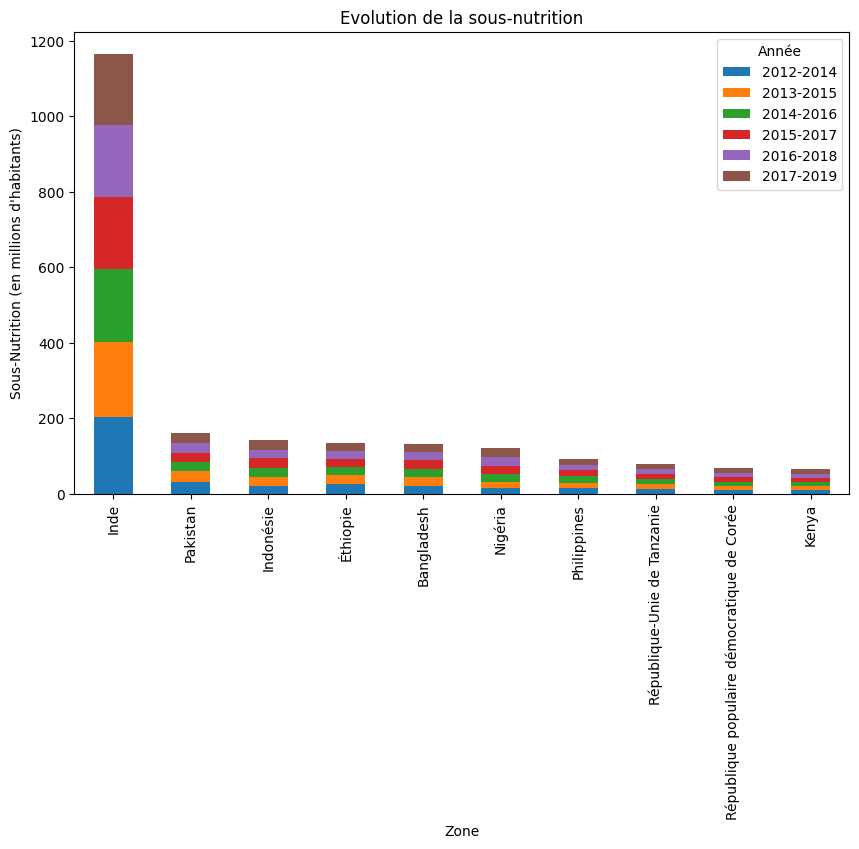

In [520]:
# Sélectionner les 10 premières zones
top_10_zones = pivot_table_nutrition.sum(axis=1).nlargest(10).index
pivot_table_nutrition_top_10 = pivot_table_nutrition.loc[top_10_zones]

# Création d'un graphique à barres empilées
pivot_table_nutrition_top_10.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajout de titres et d'étiquettes
plt.title('Evolution de la sous-nutrition')
plt.xlabel('Zone')
plt.ylabel('Sous-Nutrition (en millions d\'habitants)')

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [521]:
import math

# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

# Sélection des données de population pour l'année 2017
population_2017 = pop[population['Année'] == 2017]

# Sélection des données de sous-nutrition pour l'année 2016-2018
sous_nutrition_2016_2018 = sous_nutrition[sous_nutrition['Année'] == '2016-2018']

# Fusion des DataFrames population_2017 et sous_nutrition_2016_2018 sur la colonne 'Zone'
population_sous_nutrition = pd.merge(
    population_2017,
    sous_nutrition_2016_2018,
    on='Zone',
    how='left'
)



#Porportion de personne en sous nutrition dans le monde en 2017
# Affichage des premières lignes du DataFrame résultat
display(population_sous_nutrition)

import numpy as np

# Somme de la population
somme_population = round(population_sous_nutrition['Population'].sum() * 1000)

# Somme de la sous-nutrition
somme_sous_nutrition = (population_sous_nutrition['sous_nutrition_million_hab'].sum() / somme_population) * 100

# Utiliser numpy pour formater
formatted_sous_nutrition = np.round(somme_sous_nutrition, 2)

print("Somme de la population:", somme_population)
#Ici c'est 7.10% mais il faut régler le problème d'affichage
print("Pourcentage de la sous-nutrition:", formatted_sous_nutrition)



,Zone,Année_x,Population,Année_y,sous_nutrition_million_hab
0,Afghanistan,2017,36296113,2016-2018,10.5
1,Afrique du Sud,2017,57009756,2016-2018,3.1
2,Albanie,2017,2884169,2016-2018,0.1
3,Algérie,2017,41389189,2016-2018,1.3
4,Allemagne,2017,82658409,2016-2018,0.0
...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484,2016-2018,8.0
232,Viet Nam,2017,94600648,2016-2018,6.5
233,Yémen,2017,27834819,2016-2018,0.0
234,Zambie,2017,16853599,2016-2018,0.0


Somme de la population: 7548134097000
Pourcentage de la sous-nutrition: 0.0


In [522]:
display(population_sous_nutrition)

,Zone,Année_x,Population,Année_y,sous_nutrition_million_hab
0,Afghanistan,2017,36296113,2016-2018,10.5
1,Afrique du Sud,2017,57009756,2016-2018,3.1
2,Albanie,2017,2884169,2016-2018,0.1
3,Algérie,2017,41389189,2016-2018,1.3
4,Allemagne,2017,82658409,2016-2018,0.0
...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484,2016-2018,8.0
232,Viet Nam,2017,94600648,2016-2018,6.5
233,Yémen,2017,27834819,2016-2018,0.0
234,Zambie,2017,16853599,2016-2018,0.0


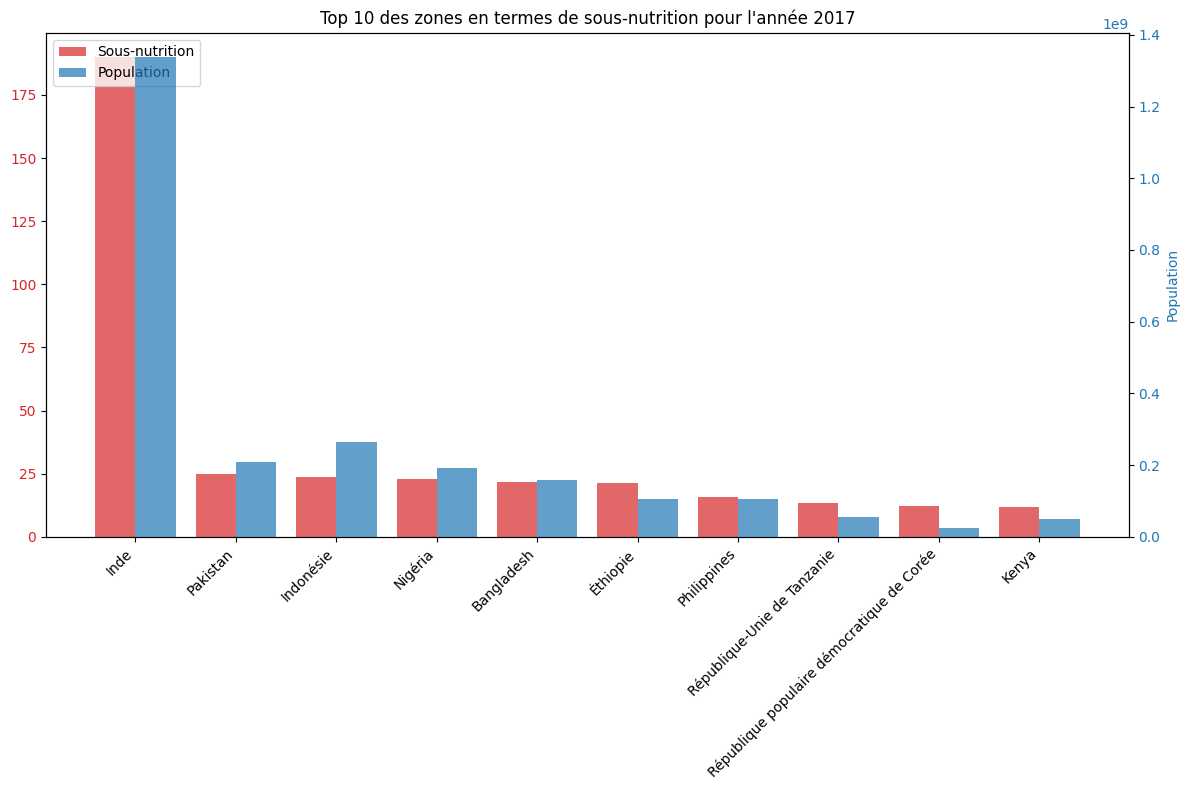

In [523]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Argumentaire analyse 

# Sélectionner les 8 premières zones en termes de sous-nutrition
top_8_zones = population_sous_nutrition.nlargest(10, 'sous_nutrition_million_hab')

# Création d'un graphique à barres avec un espacement supplémentaire
fig, ax1 = plt.subplots(figsize=(12, 8))

# Barres pour la sous-nutrition
color_nutrition = 'tab:red'
bar_width = 0.4
bar_positions = np.arange(len(top_8_zones))
ax1.bar(bar_positions - bar_width/2, top_8_zones['sous_nutrition_million_hab'], color=color_nutrition, label='Sous-nutrition', width=bar_width, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color_nutrition)

# Créer un deuxième axe Y pour la population
ax2 = ax1.twinx()
color_population = 'tab:blue'
ax2.set_ylabel('Population', color=color_population)
ax2.bar(bar_positions + bar_width/2, top_8_zones['Population'], color=color_population, label='Population', width=bar_width, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color_population)



# Rotation et inclinaison des étiquettes sur l'axe x pour plus de lisibilité
plt.xticks(bar_positions, labels=top_8_zones['Zone'], rotation=45, ha='right', va='top')
ax1.set_xticklabels(top_8_zones['Zone'], rotation=45, ha='right')


# Ajouter une légende
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Ajuster l'échelle de l'axe Y pour rendre les tendances plus visibles
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# Affichage du graphique
plt.title('Top 10 des zones en termes de sous-nutrition pour l\'année 2017')
plt.tight_layout()
plt.show()


In [524]:
display(population_sous_nutrition)

,Zone,Année_x,Population,Année_y,sous_nutrition_million_hab
0,Afghanistan,2017,36296113,2016-2018,10.5
1,Afrique du Sud,2017,57009756,2016-2018,3.1
2,Albanie,2017,2884169,2016-2018,0.1
3,Algérie,2017,41389189,2016-2018,1.3
4,Allemagne,2017,82658409,2016-2018,0.0
...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484,2016-2018,8.0
232,Viet Nam,2017,94600648,2016-2018,6.5
233,Yémen,2017,27834819,2016-2018,0.0
234,Zambie,2017,16853599,2016-2018,0.0


In [525]:
# Trier la DataFrame par ordre descendant en fonction de la colonne 'sous_nutrition'
population_sous_nutrition_sorted = population_sous_nutrition.sort_values(by='Population', ascending=False)

# Afficher la DataFrame triée
display(population_sous_nutrition_sorted)


,Zone,Année_x,Population,Année_y,sous_nutrition_million_hab
43,"Chine, continentale",2017,1421021791,2016-2018,0.0
103,Inde,2017,1338676785,2016-2018,190.1
65,États-Unis d'Amérique,2017,325084756,2016-2018,0.0
104,Indonésie,2017,264650963,2016-2018,23.6
160,Pakistan,2017,207906209,2016-2018,24.8
...,...,...,...,...,...
144,Montserrat,2017,4984,NaN,NaN
94,Îles Falkland (Malvinas),2017,3068,NaN,NaN
153,Nioué,2017,1609,2016-2018,0.0
221,Tokélaou,2017,1300,2016-2018,0.0


In [526]:
#Affichage du dataset

print(population_sous_nutrition.head())


             Zone  Année_x  Population    Année_y  sous_nutrition_million_hab
0     Afghanistan     2017    36296113  2016-2018                        10.5
1  Afrique du Sud     2017    57009756  2016-2018                         3.1
2         Albanie     2017     2884169  2016-2018                         0.1
3         Algérie     2017    41389189  2016-2018                         1.3
4       Allemagne     2017    82658409  2016-2018                         0.0


In [527]:
#Affichage du dataset

population_sous_nutrition.shape

(236, 5)

In [528]:
#Calcul et affichage du nombre de personnes en état de sous nutrition

# Affichage du nombre d'observations uniques pour chaque colonne du DataFrame population_sous_nutrition
print(population_sous_nutrition.nunique(), sep='\n')

Zone                          236
Année_x                         1
Population                    236
Année_y                         1
sous_nutrition_million_hab     50
dtype: int64


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [529]:
#Combien mange en moyenne un être humain ? Source => 

# Regroupement du DataFrame sous_nutrition par la colonne 'Valeur' et calcul de la moyenne pour chaque groupe
# Add the numeric_only parameter
sous_nutrition.groupby('sous_nutrition_million_hab').mean(numeric_only=True)
display(sous_nutrition)

,Zone,Année,sous_nutrition_million_hab
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


In [530]:
#On groupby par zone le df dispo alimentaire par zone
dispo_alimen_zone = dispo_alimentaire.groupby(['Zone'], as_index = False)
dispo_alimen_zone = dispo_alimen_zone['Disponibilité alimentaire (Kcal/personne/jour)'].sum()

besoin_moyen_kcal = 2790


#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population

# Fusion des DataFrames dispo_alimentaire et population sur la colonne 'Zone'
dispo_pop = pd.merge(dispo_alimen_zone, pop.loc[pop['Année'] == 2017], on='Zone')

# Renommage de la colonne 'Valeur' en 'nb_population'
dispo_pop = dispo_pop.rename(columns={'Valeur': 'nb_population'})

# Affichage du DataFrame résultant
display(dispo_pop)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,Afghanistan,2087.0,2017,36296113
1,Afrique du Sud,3020.0,2017,57009756
2,Albanie,3188.0,2017,2884169
3,Algérie,3293.0,2017,41389189
4,Allemagne,3503.0,2017,82658409
...,...,...,...,...
167,Émirats arabes unis,3275.0,2017,9487203
168,Équateur,2346.0,2017,16785361
169,États-Unis d'Amérique,3682.0,2017,325084756
170,Éthiopie,2129.0,2017,106399924


In [531]:
#Affichage du nouveau dataframe

display(dispo_pop)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,Afghanistan,2087.0,2017,36296113
1,Afrique du Sud,3020.0,2017,57009756
2,Albanie,3188.0,2017,2884169
3,Algérie,3293.0,2017,41389189
4,Allemagne,3503.0,2017,82658409
...,...,...,...,...
167,Émirats arabes unis,3275.0,2017,9487203
168,Équateur,2346.0,2017,16785361
169,États-Unis d'Amérique,3682.0,2017,325084756
170,Éthiopie,2129.0,2017,106399924


In [532]:
#Création de la colonne dispo_kcal par an avec calcul des kcal disponibles mondialement


dispo_pop['Disponibilité alimentaire (kcal/an)'] = dispo_pop['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_pop['Population'] * 365.25


dispo_pop.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population,Disponibilité alimentaire (kcal/an)
0,Afghanistan,2087.0,2017,36296113,2.766768e+13
1,Afrique du Sud,3020.0,2017,57009756,6.288490e+13
2,Albanie,3188.0,2017,2884169,3.358375e+12
3,Algérie,3293.0,2017,41389189,4.978160e+13
4,Allemagne,3503.0,2017,82658409,1.057590e+14


In [533]:
#Calcul du nombre de kcal disponible mondialement en 2017

dispo_ali_globale = dispo_pop['Disponibilité alimentaire (kcal/an)'].sum()
print('La dispo de kcal mondialement en 2017 est de :', dispo_ali_globale,'kcal')

La dispo de kcal mondialement en 2017 est de : 7640659128439807.0 kcal


In [534]:
#Calcul du nombre de personnnes pouvant être nourris avec les kcal de 2017
personnes_nourris_kcal_2017 = round((dispo_ali_globale / (besoin_moyen_kcal * 365.25)))
print('Le nombre théoriques de personnes pouvant être nourris avec la disponibilité kcal de 2017 est de :',personnes_nourris_kcal_2017)

Le nombre théoriques de personnes pouvant être nourris avec la disponibilité kcal de 2017 est de : 7497843946


In [535]:
pourcentage_kcal = round(personnes_nourris_kcal_2017 * 100 / (pop.loc[pop['Année'] == 2017, 'Population'].sum()))

In [536]:
print("En 2017, le nombre théoriques de personnes qui pourraient être nourries avec la disponibilité kcal mondiale de 2017 est de \n " + str((personnes_nourris_kcal_2017)/1000000) + " milliards, soit " + str(pourcentage_kcal) + " % de la population")

En 2017, le nombre théoriques de personnes qui pourraient être nourries avec la disponibilité kcal mondiale de 2017 est de 
 7497.843946 milliards, soit 99 % de la population


In [537]:
display(dispo_pop)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population,Disponibilité alimentaire (kcal/an)
0,Afghanistan,2087.0,2017,36296113,2.766768e+13
1,Afrique du Sud,3020.0,2017,57009756,6.288490e+13
2,Albanie,3188.0,2017,2884169,3.358375e+12
3,Algérie,3293.0,2017,41389189,4.978160e+13
4,Allemagne,3503.0,2017,82658409,1.057590e+14
...,...,...,...,...,...
167,Émirats arabes unis,3275.0,2017,9487203,1.134853e+13
168,Équateur,2346.0,2017,16785361,1.438298e+13
169,États-Unis d'Amérique,3682.0,2017,325084756,4.371904e+14
170,Éthiopie,2129.0,2017,106399924,8.273842e+13


In [538]:
#Calcul du nombre d'humains pouvant être nourris kg par an 

# Calcul de la disponibilité alimentaire par personne en quantité (kg/personne/an)
humain_nourris = dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'] / dispo_pop['Population']

# Affichage du résultat
print(humain_nourris)


# Calcul de la moyenne
moyenne_humain_nourris = humain_nourris.mean()
# Affichage du résultat
print(f"Moyenne de la disponibilité alimentaire par personne par an : {moyenne_humain_nourris}")

0        4.738799e-08
1        2.262771e-08
2        2.080322e-08
3        0.000000e+00
4        3.266455e-08
             ...     
15600             NaN
15601             NaN
15602             NaN
15603             NaN
15604             NaN
Length: 15605, dtype: float64
Moyenne de la disponibilité alimentaire par personne par an : 5.519486573702325e-06


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [539]:
#Transfert des données avec les végétaux dans un nouveau dataframe

display(dispo_alimentaire)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [540]:
#Calcul du nombre de kcal disponible pour les végétaux

# Sélection des données dans dispo_alimentaire où l'origine est 'vegetale'
trie_dispo_alimentaire_vegetaux = dispo_alimentaire.groupby(['Origine', 'Zone'], as_index = False).sum()

# Affichage du DataFrame résultant
display(trie_dispo_alimentaire_vegetaux)

C:\Users\Rorsharks\AppData\Local\Temp\ipykernel_3504\1093538344.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trie_dispo_alimentaire_vegetaux = dispo_alimentaire.groupby(['Origine', 'Zone'], as_index = False).sum()


,Origine,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,animale,Afghanistan,123.0,0.0,216.0,79.92,15.23,12.21,2631.0,0.0,350.0,2442.0,63.0,2280.0,2.0,0.0,0.0
1,animale,Afrique du Sud,187.0,115.0,487.0,139.63,34.66,36.39,7817.0,1088.0,1049.0,7371.0,83.0,7614.0,67.0,0.0,241.0
2,animale,Albanie,101.0,2.0,985.0,389.05,67.72,59.41,1432.0,10.0,87.0,1235.0,94.0,1355.0,0.0,0.0,0.0
3,animale,Algérie,0.0,1.0,378.0,176.78,22.36,24.98,7120.0,6.0,2731.0,6932.0,166.0,4395.0,21.0,0.0,0.0
4,animale,Allemagne,2087.0,869.0,1042.0,388.70,77.99,61.49,35409.0,22977.0,14711.0,32159.0,64.0,43621.0,76.0,156.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,vegetale,Émirats arabes unis,1174.0,2619.0,2718.0,473.18,53.00,62.81,9623.0,3326.0,12546.0,4426.0,675.0,780.0,0.0,804.0,-376.0
344,vegetale,Équateur,1001.0,1905.0,1732.0,327.21,49.48,24.80,14926.0,7142.0,1475.0,5149.0,654.0,20042.0,125.0,6200.0,555.0
345,vegetale,États-Unis d'Amérique,145289.0,145102.0,2698.0,590.68,93.68,39.65,632023.0,140442.0,69522.0,189122.0,6937.0,740194.0,9030.0,140986.0,-37242.0
346,vegetale,Éthiopie,667.0,3641.0,2005.0,300.99,17.88,52.70,38824.0,918.0,1694.0,28320.0,2125.0,40907.0,635.0,3443.0,-2857.0


In [541]:
trie_dispo_alimentaire_vegetaux = trie_dispo_alimentaire_vegetaux.loc[(trie_dispo_alimentaire_vegetaux['Origine'] == 'vegetale')]
trie_dispo_alimentaire_vegetaux.head()

,Origine,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
174,vegetale,Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0
175,vegetale,Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0
176,vegetale,Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0
177,vegetale,Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0
178,vegetale,Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0


In [542]:
trie_dispo_alimentaire_vege_pop = pd.merge(trie_dispo_alimentaire_vegetaux, pop.loc[pop['Année'] == 2017])
trie_dispo_alimentaire_vege_pop.head(5)

,Origine,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,vegetale,Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0,2017,36296113
1,vegetale,Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0,2017,57009756
2,vegetale,Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0,2017,2884169
3,vegetale,Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0,2017,41389189
4,vegetale,Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0,2017,82658409


In [543]:
trie_dispo_alimentaire_vege_pop['Disponibilité alimentaire vegetale (kcal/an)'] = trie_dispo_alimentaire_vege_pop['Disponibilité alimentaire (Kcal/personne/jour)'] * trie_dispo_alimentaire_vege_pop['Population'] * 365.25
trie_dispo_alimentaire_vege_pop.head()

,Origine,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,Disponibilité alimentaire vegetale (kcal/an)
0,vegetale,Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0,2017,36296113,2.480414e+13
1,vegetale,Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0,2017,57009756,5.274419e+13
2,vegetale,Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0,2017,2884169,2.320734e+12
3,vegetale,Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0,2017,41389189,4.406722e+13
4,vegetale,Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0,2017,82658409,7.430001e+13


In [544]:
dispo_ali_vegetale_globale = trie_dispo_alimentaire_vege_pop['Disponibilité alimentaire vegetale (kcal/an)'].sum()
print('La disponibilité kcal végétale en 2017 est de :',dispo_ali_vegetale_globale,'kcal')

La disponibilité kcal végétale en 2017 est de : 6304494123109117.0 kcal


In [545]:
personnes_nourris_vegetal = round((dispo_ali_vegetale_globale / (besoin_moyen_kcal * 365.25)))
personnes_nourris_vegetal

6186653834

In [546]:
pourcentage_vege = round(personnes_nourris_vegetal * 100 / (pop.loc[pop['Année'] == 2017, 'Population'].sum()))

In [547]:
print("En 2017, le nombre théoriques de personnes qui pourraient être nourries avec la disponibilité kcal végétale mondiale de 2017 est de \n " + str((personnes_nourris_vegetal)/1000000) + " milliards, soit " + str(pourcentage_vege) + " % de la population")

En 2017, le nombre théoriques de personnes qui pourraient être nourries avec la disponibilité kcal végétale mondiale de 2017 est de 
 6186.653834 milliards, soit 82 % de la population


In [548]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
# Calculer la disponobilité alimentaire kg par an des végéteaux 

# Calcul de la disponibilité alimentaire en kg/personne/an
humain_nourris_vegetaux = trie_dispo_alimentaire_vege_pop['Disponibilité alimentaire en quantité (kg/personne/an)'] / pop['Population']

# Affichage de la disponibilité alimentaire par personne
print(humain_nourris_vegetaux)


# Calculer la moyenne du taux de disponibilité alimentaire avec les végétaux
moyenne_disponibilite_vegetaux = humain_nourris_vegetaux.mean()

# Affichage de la moyenne de la disponibilité alimentaire
print("Moyenne du taux de disponibilité alimentaire avec les végétaux:", moyenne_disponibilite_vegetaux)

0       0.000008
1       0.000013
2       0.000021
3       0.000018
4       0.000016
          ...   
1411         NaN
1412         NaN
1413         NaN
1414         NaN
1415         NaN
Length: 1416, dtype: float64
Moyenne du taux de disponibilité alimentaire avec les végétaux: 0.0029597403185104183


In [549]:
# Calculer la disponobilité alimentaire kacl par jour des végéteaux 

# Calcul de la disponibilité alimentaire en Kcal/personne/jour
humain_nourris_vegetaux = trie_dispo_alimentaire_vegetaux ['Disponibilité alimentaire (Kcal/personne/jour)'] / pop['Population']

# Affichage de la disponibilité alimentaire par personne
print(humain_nourris_vegetaux)

# Calcul de la moyenne de la disponibilité alimentaire
moyenne_disponibilite_alimentaire = trie_dispo_alimentaire_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)'].mean()

# Affichage de la moyenne de la disponibilité alimentaire
print("Moyenne de la disponibilité alimentaire végétale par jour:", moyenne_disponibilite_alimentaire)


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1411   NaN
1412   NaN
1413   NaN
1414   NaN
1415   NaN
Length: 1416, dtype: float64
Moyenne de la disponibilité alimentaire végétale par jour: 2291.8505747126437


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [550]:
#Calcul de la disponibilité totale

# Calcul de la somme totale de la disponibilité alimentaire en Kcal par personne par jour
# Utilisation de la fonction sum() pour additionner toutes les valeurs de la colonne 'Disponibilité alimentaire (Kcal/personne/jour)'
somme_disponibilite = dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].sum()

# Affichage de la somme totale de la disponibilité alimentaire
print(somme_disponibilite)

495442.0


In [551]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 

colonnes_a_afficher = ['Aliments pour animaux', 'Pertes', 'Nourriture']

for index, row in dispo_alimentaire.iterrows():
  
  for colonne in colonnes_a_afficher:
        valeur = row[colonne]
        print(f"{colonne}: {valeur}")

#for colonne in colonnes_a_afficher:
    #moyenne_colonne = dispo_alimentaire[colonne].mean()
    #print(f"Moyenne de {colonne}: {moyenne_colonne}")


for colonne in colonnes_a_afficher:
    moyenne_colonne = dispo_alimentaire[colonne].mean()
    moyenne_arrondie = round(moyenne_colonne, 2)  # décimales (ici, 2)
    print(f"Moyenne de {colonne}: {moyenne_arrondie}")


Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 53.0
Aliments pour animaux: 0.0
Pertes: 2.0
Nourriture: 39.0
Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 2.0
Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 0.0
Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 82.0
Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 36.0
Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 3.0
Aliments pour animaux: 0.0
Pertes: 775.0
Nourriture: 4895.0
Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 0.0
Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 0.0
Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 0.0
Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 18.0
Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 0.0
Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 1.0
Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 16.0
Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 1.0
Aliments pour animaux: 0.0
Pertes: 17.0
Nourriture: 223.0
Aliments pour animaux: 0.0
Pertes: 0.0
Nourriture: 

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [552]:
#Création d'une liste avec toutes les variables

list_cereales = ['Avoine', 'Blé','Céréales, Autres','Maïs','Millet',
    'Orge ','Riz ','Seigle','Sorgho']

display(aide_alimentaire)

,Pays bénéficiaire,Année,Produit,poids_kg
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96000
1471,Zimbabwe,2013,Non-céréales,5022000
1472,Zimbabwe,2014,Non-céréales,2310000
1473,Zimbabwe,2015,Non-céréales,306000


In [553]:
# Créez la liste des céréales que vous souhaitez extraire
list_cereales = ['Avoine', 'Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz', 'Seigle', 'Sorgho']

# Convertissez les noms de céréales en minuscules pour assurer la correspondance
list_cereales = [cereal.lower() for cereal in list_cereales]

# Créez une nouvelle DataFrame avec uniquement les lignes correspondant aux céréales de la liste
df_cereales = dispo_alimentaire[dispo_alimentaire['Produit'].str.lower().isin(list_cereales)]

# Filtrez les lignes où la colonne "Aliments pour animaux" contient le mot "végétal"
aliments_vegetaux_animaux = df_cereales[df_cereales['Aliments pour animaux'].astype(str).str.lower().str.contains('végétal')]

# Affichez les produits, la disponibilité intérieure et tous les produits de la DataFrame
print("Produits pour les aliments pour animaux:")
print(aliments_vegetaux_animaux[['Produit', 'Disponibilité intérieure']])

print("\nTous les produits:")
display(df_cereales[['Produit', 'Disponibilité intérieure']])



# Calculez la somme totale de la disponibilité intérieure des céréales pour les animaux
sum_disponibilite_int_animaux = df_cereales['Disponibilité intérieure'].sum()

# Affichez la somme totale des céréales pour les animaux
print("Somme totale de la disponibilité intérieure des céréales pour les animaux:", sum_disponibilite_int_animaux)

# Calculez la somme totale de la disponibilité intérieure de toutes les céréales
sum_disponibilite_int_toutes_cereales = dispo_alimentaire[dispo_alimentaire['Produit'].str.lower().isin(list_cereales)]['Disponibilité intérieure'].sum()

# Calculez la proportion
proportion = sum_disponibilite_int_animaux / sum_disponibilite_int_toutes_cereales

# Affichez la proportion
print("Proportion de la disponibilité intérieure des céréales pour les animaux par rapport à toutes les céréales:", proportion)


Produits pour les aliments pour animaux:
Empty DataFrame
Columns: [Produit, Disponibilité intérieure]
Index: []

Tous les produits:


,Produit,Disponibilité intérieure
7,Blé,5992.0
12,"Céréales, Autres",0.0
32,Maïs,313.0
34,Millet,13.0
40,Orge,524.0
...,...,...
15537,Blé,14.0
15545,"Céréales, Autres",0.0
15568,Maïs,0.0
15575,Orge,1.0


Somme totale de la disponibilité intérieure des céréales pour les animaux: 1931343.0
Proportion de la disponibilité intérieure des céréales pour les animaux par rapport à toutes les céréales: 1.0


In [554]:
import pandas as pd

# Créez la liste des céréales que vous souhaitez extraire
list_cereales = ['Avoine', 'Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz', 'Seigle', 'Sorgho']

# Convertissez les noms de céréales en minuscules pour assurer la correspondance
list_cereales = [cereal.lower() for cereal in list_cereales]

# Créez une nouvelle DataFrame avec uniquement les lignes correspondant aux céréales de la liste
df_cereales = dispo_alimentaire[dispo_alimentaire['Produit'].str.lower().isin(list_cereales)]

# Calculez la somme totale de la disponibilité intérieure des céréales pour les humains
sum_disponibilite_int_humains = df_cereales['Disponibilité intérieure'].sum()

# Calculez la somme totale de la population
sum_population = pop['Population'].sum()

# Calculez la proportion
proportion = sum_disponibilite_int_humains / sum_population

# Affichez la somme totale de la disponibilité intérieure des céréales pour les humains
print("Somme totale de la disponibilité intérieure des céréales pour les humains:", sum_disponibilite_int_humains)

# Affichez la somme totale de la population
print("Somme totale de la population:", sum_population)

# Affichez la proportion
print("Proportion de la disponibilité intérieure des céréales pour les humains par rapport à la population totale:", proportion)


Somme totale de la disponibilité intérieure des céréales pour les humains: 1931343.0
Somme totale de la population: 44530267991
Proportion de la disponibilité intérieure des céréales pour les humains par rapport à la population totale: 4.337146590697238e-05


In [555]:
#Affichage de la proportion d'alimentation animale

display(dispo_alimentaire)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [556]:
# Calcul de la somme des aliments pour animaux 

# Suppose que list_cereales 

df_cereales = pd.DataFrame(list_cereales)

# Calcul de la moyenne des aliments pour animaux
moyenne_aliments_animaux = dispo_alimentaire["Aliments pour animaux"].mean()

# Calcul de la moyenne de la disponibilité intérieure
moyenne_disponibilite_interieure = dispo_alimentaire["Disponibilité intérieure"].mean()

# Calcul de la proportion d'aliments pour animaux par rapport à la disponibilité intérieure
proportion_aliments_animaux = moyenne_aliments_animaux * 100 / moyenne_disponibilite_interieure

# Affichage du résultat
print("Proportion d'alimentation animale : {:.2f}%".format(proportion_aliments_animaux))

Proportion d'alimentation animale : 13.24%


In [557]:
# Calcul de la somme des aliments pour humain
total_nourriture = dispo_alimentaire["Nourriture"].sum()

# Afficher la somme totale
print("Somme totale de la colonne 'Nourriture':", total_nourriture)



# Convertir la liste en DataFrame
df_cereales = pd.DataFrame(list_cereales)

# Calcul de la moyenne de la nourriture pour les céréales
moyenne_nourriture = dispo_alimentaire["Nourriture"].mean()

# Calcul de la moyenne de la disponibilité intérieure pour les céréales
moyenne_disponibilite_interieure = dispo_alimentaire["Disponibilité intérieure"].mean()

# Calcul de la proportion d'alimentation humaine par rapport à la disponibilité intérieure
proportion_alimentation_humaine = moyenne_nourriture * 100 / moyenne_disponibilite_interieure


# Affichage du résultat
print("Proportion d'alimentation humaine : {:.2f}%".format(proportion_alimentation_humaine))



Somme totale de la colonne 'Nourriture': 4876258.0
Proportion d'alimentation humaine : 49.51%


In [558]:
dispo_ali_tri = dispo_alimentaire.groupby(['Zone']).sum()
dispo_ali_tri = dispo_ali_tri.drop(['Exportations - Quantité', 'Importations - Quantité', 'Production', 'Variation de stock', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)'], axis=1)

dispo_ali_tri.head()

C:\Users\Rorsharks\AppData\Local\Temp\ipykernel_3504\2082804769.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dispo_ali_tri = dispo_alimentaire.groupby(['Zone']).sum()


,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Nourriture,Pertes,Semences,Traitement
Zone,,,,,,,
Afghanistan,768.0,415.0,13515.0,10735.0,1135.0,395.0,63.0
Afrique du Sud,5309.0,876.0,61256.0,29812.0,2193.0,253.0,22819.0
Albanie,660.0,174.0,4758.0,3476.0,276.0,55.0,113.0
Algérie,4352.0,1707.0,42630.0,31729.0,3753.0,449.0,637.0
Allemagne,30209.0,7711.0,162275.0,79238.0,3781.0,1551.0,39842.0


In [559]:
#On calcule les proportions des différentes variables

proportion_animale = round(dispo_ali_tri['Aliments pour animaux'].sum() * 100 / dispo_ali_tri['Disponibilité intérieure'].sum(), 2)
proportion_humaine = round(dispo_ali_tri['Nourriture'].sum() * 100 / dispo_ali_tri['Disponibilité intérieure'].sum(),2)
proportion_perdue = round(dispo_ali_tri['Pertes'].sum() * 100 / dispo_ali_tri['Disponibilité intérieure'].sum(), 2)
proportion_reste = round(100 - (proportion_animale + proportion_humaine + proportion_perdue) , 2)

In [560]:
print("La disponibilité intérieure est répartie en : " + str(proportion_animale) + " % pour l'alimentation animale, " + str(proportion_humaine) + " % pour l'alimentation \nhumaine, " + str(proportion_perdue) + " % de pertes et " + str(proportion_reste) + " % pour le reste.") 

La disponibilité intérieure est répartie en : 13.24 % pour l'alimentation animale, 49.51 % pour l'alimentation 
humaine, 4.61 % de pertes et 32.64 % pour le reste.


In [561]:
list_cereales = ('Avoine', 'Blé', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Seigle', 'Sorgho', 'Céréales, Autres')
dispo_cereales = dispo_alimentaire[dispo_alimentaire['Produit'].isin(list_cereales)].groupby(by=["Zone"], as_index=False).sum()
dispo_cereales

C:\Users\Rorsharks\AppData\Local\Temp\ipykernel_3504\3719928796.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dispo_cereales = dispo_alimentaire[dispo_alimentaire['Produit'].isin(list_cereales)].groupby(by=["Zone"], as_index=False).sum()


,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,560.0,0.0,1560.0,179.87,5.52,41.04,7303.0,0.0,1303.0,5494.0,883.0,6350.0,363.0,0.0,-350.0
1,Afrique du Sud,4824.0,0.0,1538.0,180.02,10.20,41.09,15493.0,3777.0,3147.0,9503.0,500.0,14155.0,73.0,593.0,1969.0
2,Albanie,411.0,134.0,1144.0,149.27,6.08,35.49,1145.0,4.0,468.0,474.0,91.0,703.0,22.0,12.0,-22.0
3,Algérie,4337.0,820.0,1678.0,217.67,6.79,49.33,15013.0,2.0,10279.0,8535.0,1024.0,4914.0,253.0,42.0,-180.0
4,Allemagne,26615.0,1013.0,872.0,111.11,3.48,26.39,42158.0,16721.0,11093.0,9191.0,1221.0,47757.0,1027.0,3090.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1053.0,263.0,1379.0,158.68,5.66,34.21,3142.0,619.0,4249.0,1484.0,384.0,55.0,0.0,0.0,-543.0
170,Équateur,847.0,787.0,812.0,95.57,3.12,18.85,3407.0,53.0,877.0,1505.0,138.0,2598.0,39.0,93.0,-15.0
171,États-Unis d'Amérique,140096.0,137181.0,801.0,105.63,3.63,23.70,343006.0,66302.0,13477.0,33810.0,222.0,433686.0,3098.0,28608.0,-37854.0
172,Éthiopie,667.0,3569.0,1362.0,150.46,6.06,36.69,20278.0,24.0,1055.0,14158.0,1168.0,22646.0,385.0,333.0,-3397.0


In [562]:
proportion_animaux = dispo_cereales['Aliments pour animaux'].sum()* 100 / dispo_cereales['Disponibilité intérieure'].sum()
proportion_nourriture = dispo_cereales['Nourriture'].sum() * 100 / dispo_cereales['Disponibilité intérieure'].sum()
difference_nourriture = proportion_nourriture / proportion_animaux

In [563]:
print("La part de céréales allouée à l'alimentation humaine est de " + str(round(proportion_nourriture, 2)) + " %, la part allouée à l'alimentation animale est \nde " + str(round(proportion_animaux, 2)) + " %, soit environ " + str(round(difference_nourriture, 2)) + " fois moins.")

La part de céréales allouée à l'alimentation humaine est de 42.75 %, la part allouée à l'alimentation animale est 
de 36.29 %, soit environ 1.18 fois moins.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [564]:
#Création de la colonne proportion par pays

# Calculer le total de sous-nutrition par pays en prenant la dernière valeur pour chaque pays
total_sous_nutrition_par_pays = sous_nutrition.groupby('Zone')['sous_nutrition_million_hab'].last().reset_index()

# Afficher le DataFrame résultant
display(total_sous_nutrition_par_pays)


,Zone,sous_nutrition_million_hab
0,Afghanistan,11.1
1,Afrique du Sud,3.3
2,Albanie,0.1
3,Algérie,1.2
4,Allemagne,0.0
...,...,...
198,États-Unis d'Amérique,0.0
199,Éthiopie,21.5
200,Îles Cook,0.0
201,Îles Marshall,0.0


In [565]:
#affichage après trie des 10 pires pays

# Filtrer les données de sous-nutrition pour la tranche d'années '2016-2018'
sous_nutrition_2016_2018 = sous_nutrition[sous_nutrition['Année'] == '2016-2018']

# Supprimer les doublons dans la colonne 'Zone'
sous_nutrition_sans_doublons = sous_nutrition_2016_2018.drop_duplicates('Zone')

# Trier le DataFrame de sous-nutrition par la colonne 'Zone' de manière décroissante
sous_nutrition_top_10 = sous_nutrition_sans_doublons.sort_values('Zone', ascending=False).head(10)

# Afficher le DataFrame résultant
display(sous_nutrition_top_10)


,Zone,Année,sous_nutrition_million_hab
502,Îles Salomon,2016-2018,0.0
496,Îles Marshall,2016-2018,0.0
490,Îles Cook,2016-2018,0.0
370,Éthiopie,2016-2018,21.1
364,États-Unis d'Amérique,2016-2018,0.0
340,Érythrée,2016-2018,0.0
334,Équateur,2016-2018,1.5
328,Émirats arabes unis,2016-2018,0.3
316,Égypte,2016-2018,4.6
1216,Zimbabwe,2016-2018,0.0


Note: you may need to restart the kernel to use updated packages.
+--------------------------------------------+----------------------------+-------------+
| Zone                                       | sous_nutrition_million_hab | Pourcentage |
+--------------------------------------------+----------------------------+-------------+
| Inde                                       |                      190.1 |      53.26% |
| Pakistan                                   |                       24.8 |       6.95% |
| Indonésie                                  |                       23.6 |       6.61% |
| Nigéria                                    |                       22.8 |       6.39% |
| Bangladesh                                 |                       21.5 |       6.02% |
| Éthiopie                                   |                       21.1 |       5.91% |
| Philippines                                |                       15.7 |       4.40% |
| République-Unie de Tanzanie     

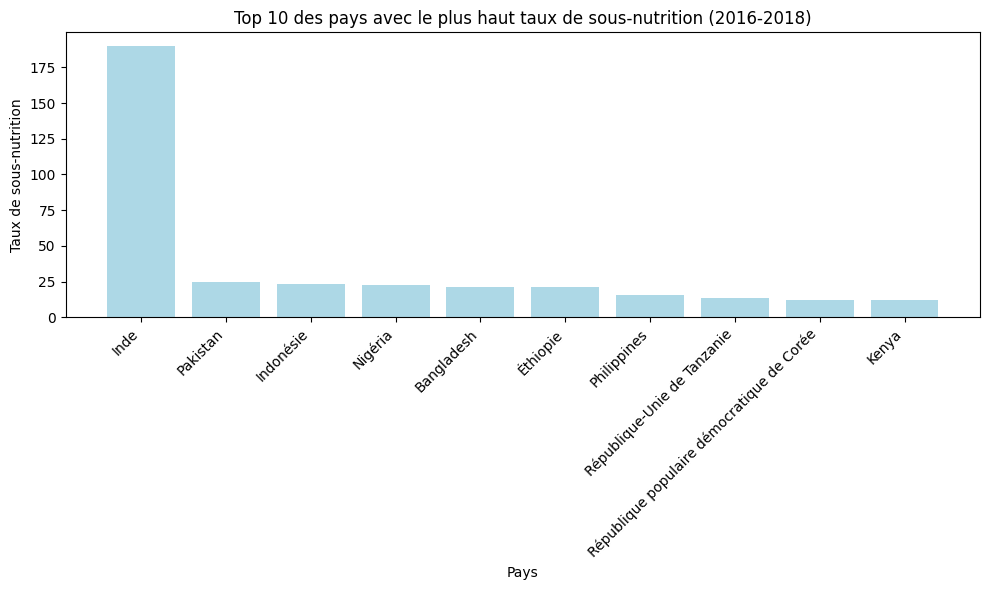

In [566]:
%pip install tabulate
from tabulate import tabulate

#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire et en pourcentage 
# Filtrer les données de sous-nutrition pour la tranche d'années '2016-2018'

# Trier le DataFrame de sous-nutrition par la colonne 'Valeur' de manière décroissante
sous_nutrition_top_10_unique = sous_nutrition_sans_doublons.sort_values('sous_nutrition_million_hab', ascending=False).head(10)

# Les valeurs fournies
valeurs = sous_nutrition_top_10_unique['sous_nutrition_million_hab'].tolist()
zones = sous_nutrition_top_10_unique['Zone'].tolist()

# Calcul de la somme totale
somme_totale = sum(valeurs)

# Calcul des pourcentages pour chaque valeur
pourcentages = [(valeur / somme_totale) * 100 for valeur in valeurs]

# Création d'une liste de listes pour tabulate
table_data = []
for i in range(len(zones)):
    table_data.append([zones[i], valeurs[i], f"{pourcentages[i]:.2f}%"])

# Affichage des résultats pour les 10 pays avec le taux de sous-nutrition le plus élevé
table_headers = ["Zone", "sous_nutrition_million_hab", "Pourcentage"]
print(tabulate(table_data, headers=table_headers, tablefmt="pretty", colalign=("left", "right", "right")))





# Graphique barre 


# Filtrer les données de sous-nutrition pour la tranche d'années '2016-2018'
sous_nutrition_2016_2018 = sous_nutrition[sous_nutrition['Année'] == '2016-2018']

# Supprimer les doublons dans la colonne 'Zone'
sous_nutrition_sans_doublons = sous_nutrition_2016_2018.drop_duplicates('Zone')



# Affiche les 10 pays avec le taux de sous-nutrition le plus élevé
plt.figure(figsize=(10, 6))
plt.bar(sous_nutrition_top_10_unique['Zone'], sous_nutrition_top_10_unique['sous_nutrition_million_hab'], color='lightblue')
plt.xlabel('Pays')
plt.ylabel('Taux de sous-nutrition')
plt.title('Top 10 des pays avec le plus haut taux de sous-nutrition (2016-2018)')
plt.xticks(rotation=45, ha='right')  # Rotation des noms de pays pour une meilleure lisibilité
plt.tight_layout()
plt.show()


+----------------------+----------------+-------------+
|         Pays         | Poids par jour | Pourcentage |
+----------------------+----------------+-------------+
|       Géorgie        |     93.15      |    0.40     |
|     Timor-Leste      |     317.81     |    1.35     |
|        Zambie        |     898.63     |    3.82     |
|         Iraq         |    1824.66     |    7.76     |
|     Tadjikistan      |    2043.84     |    8.69     |
| Sao Tomé-et-Principe |    2438.36     |    10.37    |
|        Égypte        |    3073.97     |    13.07    |
|       Équateur       |    3731.51     |    15.87    |
|         Cuba         |    4367.12     |    18.57    |
|       Bhoutan        |    4723.29     |    20.09    |
+----------------------+----------------+-------------+


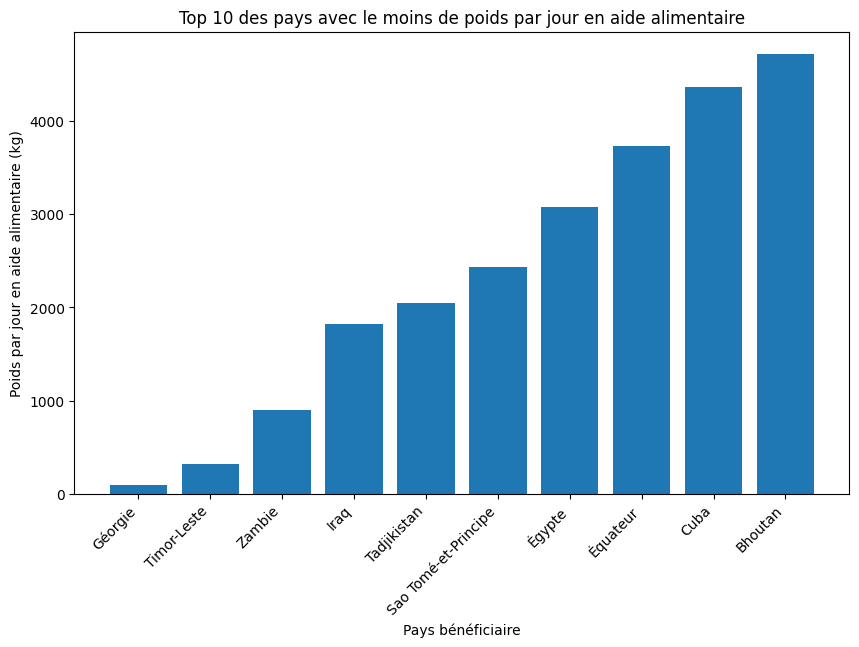

In [567]:
# Sélectionner les 10 premiers pays avec le plus grand poids en aide alimentaire par ans 
aide_alimentaire_2013 = aide_alimentaire[aide_alimentaire['Année'] == 2013]

# Grouper les données par la colonne 'Zone' et prendre la somme des poids
zones_groupées = aide_alimentaire_2013.groupby('Pays bénéficiaire')['poids_kg'].sum().reset_index()

# Ajouter une colonne pour le nombre de jours (hypothétique)
zones_groupées['Nombre de jours'] = 365  # Ajoutez la valeur réelle si disponible

# Calculer le poids par jour et arrondir le résultat
zones_groupées['Poids par jour'] = round(zones_groupées['poids_kg'] / zones_groupées['Nombre de jours'], 2)

# Sélectionner les 10 pays avec le moins de poids en aide alimentaire par jour et pourcentage

pays_moins_aide_tries_par_jour = zones_groupées.nsmallest(10, 'Poids par jour').sort_values(by='Poids par jour', ascending=True)

# Calculer le pourcentage pour chaque pays
total_poids = pays_moins_aide_tries_par_jour['Poids par jour'].sum()
pays_moins_aide_tries_par_jour['Pourcentage'] = (pays_moins_aide_tries_par_jour['Poids par jour'] / total_poids) * 100

# Appliquer le formatage pourcentage à deux décimales
pays_moins_aide_tries_par_jour['Pourcentage'] = pays_moins_aide_tries_par_jour['Pourcentage'].apply(lambda x: "{:.2f}".format(x))

# Afficher le tableau avec les pays, le poids par jour et le pourcentage
table = tabulate(pays_moins_aide_tries_par_jour[['Pays bénéficiaire', 'Poids par jour', 'Pourcentage']],
                 headers=['Pays', 'Poids par jour', 'Pourcentage'], tablefmt='pretty', showindex=False)

print(table)







# graphique barre vérticale 
# Sélectionner les 10 pays avec le moins de poids en aide alimentaire par jour

pays_moins_aide_tries_par_jour = zones_groupées.nsmallest(10, 'Poids par jour').sort_values(by='Poids par jour', ascending=True)

# Créer un graphique à barres verticales
plt.figure(figsize=(10, 6))
plt.bar(pays_moins_aide_tries_par_jour['Pays bénéficiaire'], pays_moins_aide_tries_par_jour['Poids par jour'])
plt.xlabel('Pays bénéficiaire')
plt.ylabel('Poids par jour en aide alimentaire (kg)')
plt.title('Top 10 des pays avec le moins de poids par jour en aide alimentaire')
plt.xticks(rotation=45, ha='right')  # Ajuster l'angle des noms de pays pour une meilleure lisibilité
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [568]:
#calcul du total de l'aide alimentaire par pays

# Définir une fonction personnalisée pour obtenir la dernière valeur d'une série
def get_last_value(series):
    return series.iloc[-1]

# Appliquer la fonction personnalisée avec .agg() pour chaque groupe
total_aide_alimentaire = aide_alimentaire.groupby('Pays bénéficiaire').agg({'poids_kg': get_last_value}).reset_index()

# Afficher le DataFrame résultant
print(total_aide_alimentaire)

   Pays bénéficiaire  poids_kg
0        Afghanistan     88000
1            Algérie    360000
2             Angola      7000
3         Bangladesh     43000
4            Bhoutan    537000
..               ...       ...
71            Zambie    164000
72          Zimbabwe     64000
73            Égypte    561000
74          Équateur    345000
75          Éthiopie   2400000

[76 rows x 2 columns]


In [569]:
# Sélectionner les 10 premiers pays avec le plus grand poids en aide alimentaire par ans 
aide_alimentaire_2013 = aide_alimentaire[aide_alimentaire['Année'] == 2013]

# Grouper les données par la colonne 'Zone' et prendre la somme des poids
zones_groupées = aide_alimentaire_2013.groupby('Pays bénéficiaire')['poids_kg'].sum().reset_index()

# Sélectionner les 10 premières zones avec le plus grand poids en aide alimentaire
zones_plus_aide_tries = zones_groupées.nlargest(10, 'poids_kg').sort_values(by='poids_kg', ascending=True)

# Afficher le DataFrame avec des valeurs uniques depuis 2013, regroupées par zone
display(zones_plus_aide_tries)

,Pays bénéficiaire,poids_kg
0,Afghanistan,128238000
3,Bangladesh,131018000
56,Somalie,139800000
50,République démocratique du Congo,150320000
58,Soudan du Sud,196330000
28,Kenya,220966000
66,Yémen,264764000
57,Soudan,330230000
47,République arabe syrienne,563566000
71,Éthiopie,591404000


,Pays bénéficiaire,poids_kg,Nombre de jours,Poids par jour
0,Afghanistan,128238000,365,351336.99
3,Bangladesh,131018000,365,358953.42
56,Somalie,139800000,365,383013.70
50,République démocratique du Congo,150320000,365,411835.62
58,Soudan du Sud,196330000,365,537890.41
28,Kenya,220966000,365,605386.30
66,Yémen,264764000,365,725380.82
57,Soudan,330230000,365,904739.73
47,République arabe syrienne,563566000,365,1544016.44
71,Éthiopie,591404000,365,1620284.93


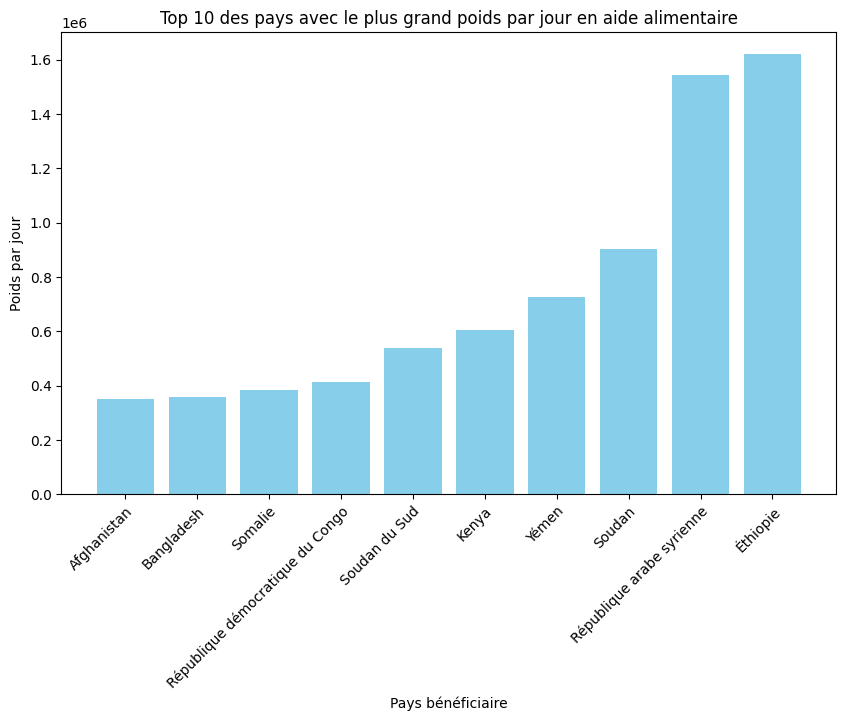

In [570]:
# Sélectionner les 10 premiers pays avec le plus grand poids en aide alimentaire par jour
aide_alimentaire_2013 = aide_alimentaire[aide_alimentaire['Année'] == 2013]

# Grouper les données par la colonne 'Zone' et prendre la somme des poids
zones_groupées = aide_alimentaire_2013.groupby('Pays bénéficiaire')['poids_kg'].sum().reset_index()

# Ajouter une colonne pour le nombre de jours (hypothétique)
zones_groupées['Nombre de jours'] = 365  # Ajoutez la valeur réelle si disponible

# Calculer le poids par jour et arrondir le résultat
zones_groupées['Poids par jour'] = round(zones_groupées['poids_kg'] / zones_groupées['Nombre de jours'], 2)
# Sélectionner les 10 premières zones avec le plus grand poids par jour en aide alimentaire
zones_plus_aide_tries_par_jour = zones_groupées.nlargest(10, 'Poids par jour').sort_values(by='Poids par jour', ascending=True)

# Afficher le DataFrame avec des valeurs uniques depuis 2013, regroupées par zone
display(zones_plus_aide_tries_par_jour)





# Graphique

# Sélectionner les 10 premières zones avec le plus grand poids par jour en aide alimentaire
zones_plus_aide_tries_par_jour = zones_groupées.nlargest(10, 'Poids par jour').sort_values(by='Poids par jour', ascending=True)

# Créer un graphique à barres verticales
plt.figure(figsize=(10, 6))
bars = plt.bar(zones_plus_aide_tries_par_jour['Pays bénéficiaire'], zones_plus_aide_tries_par_jour['Poids par jour'], color='skyblue')

plt.ylabel('Poids par jour')
plt.xlabel('Pays bénéficiaire')
plt.title('Top 10 des pays avec le plus grand poids par jour en aide alimentaire')

# Ajuster l'espacement entre les noms de pays bénéficiaires pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.show()

+----------------------+----------------+-------------+
|         Pays         | Poids par jour | Pourcentage |
+----------------------+----------------+-------------+
|       Géorgie        |     93.15      |    0.40     |
|     Timor-Leste      |     317.81     |    1.35     |
|        Zambie        |     898.63     |    3.82     |
|         Iraq         |    1824.66     |    7.76     |
|     Tadjikistan      |    2043.84     |    8.69     |
| Sao Tomé-et-Principe |    2438.36     |    10.37    |
|        Égypte        |    3073.97     |    13.07    |
|       Équateur       |    3731.51     |    15.87    |
|         Cuba         |    4367.12     |    18.57    |
|       Bhoutan        |    4723.29     |    20.09    |
+----------------------+----------------+-------------+


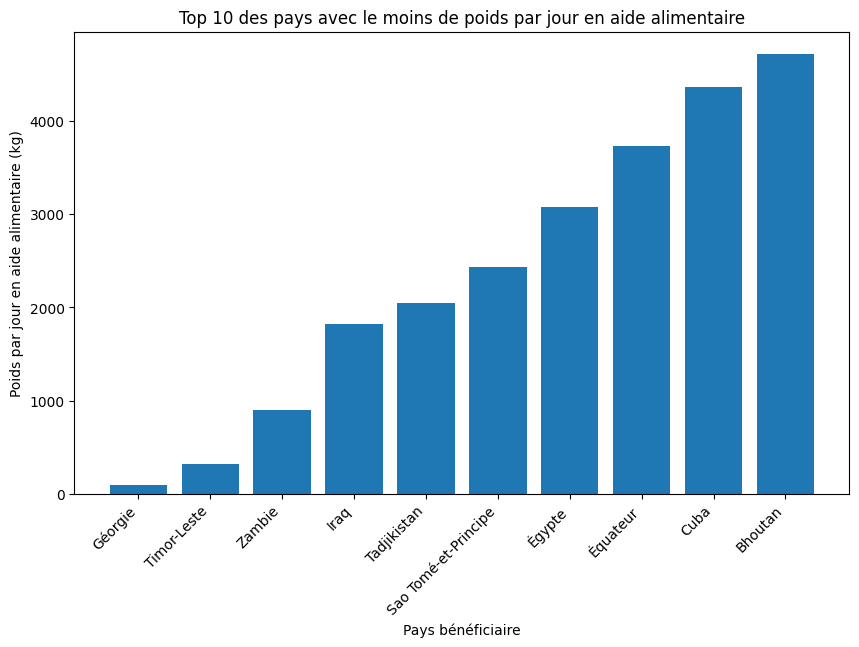

In [571]:

# Arrondir les valeurs dans la colonne 'Poids par jour' à deux décimales
pays_moins_aide_tries_par_jour['Poids par jour'] = round(pays_moins_aide_tries_par_jour['Poids par jour'], 2)

# Calculer le pourcentage pour chaque pays
total_poids = pays_moins_aide_tries_par_jour['Poids par jour'].sum()
pays_moins_aide_tries_par_jour['Pourcentage'] = (pays_moins_aide_tries_par_jour['Poids par jour'] / total_poids) * 100

# Appliquer le formatage pourcentage à deux décimales
pays_moins_aide_tries_par_jour['Pourcentage'] = pays_moins_aide_tries_par_jour['Pourcentage'].apply(lambda x: "{:.2f}".format(x))

# Afficher le tableau avec les pays, le poids par jour et le pourcentage
table = tabulate(pays_moins_aide_tries_par_jour[['Pays bénéficiaire', 'Poids par jour', 'Pourcentage']],
                 headers=['Pays', 'Poids par jour', 'Pourcentage'], tablefmt='pretty', showindex=False)

print(table)







# graphique barre vérticale 
# Sélectionner les 10 pays avec le moins de poids en aide alimentaire par jour

pays_moins_aide_tries_par_jour = zones_groupées.nsmallest(10, 'Poids par jour').sort_values(by='Poids par jour', ascending=True)

# Créer un graphique à barres verticales
plt.figure(figsize=(10, 6))
plt.bar(pays_moins_aide_tries_par_jour['Pays bénéficiaire'], pays_moins_aide_tries_par_jour['Poids par jour'])
plt.xlabel('Pays bénéficiaire')
plt.ylabel('Poids par jour en aide alimentaire (kg)')
plt.title('Top 10 des pays avec le moins de poids par jour en aide alimentaire')
plt.xticks(rotation=45, ha='right')  # Ajuster l'angle des noms de pays pour une meilleure lisibilité
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [572]:
# Sélectionner les 5 pays uniques avec le plus grand poids en aide alimentaire

# Filtrer les données pour la tranche d'année 2013-2016
df_filtre = aide_alimentaire[(aide_alimentaire['Année'] >= 2013) & (aide_alimentaire['Année'] <= 2016)]

# Ensuite, effectuez votre analyse sur les données filtrées
top_pays = df_filtre.groupby('Pays bénéficiaire')['poids_kg'].max().nlargest(5)

# Afficher la liste des noms de pays
pays_plus_beneficiaires = top_pays.index.tolist()
print(pays_plus_beneficiaires)



['Éthiopie', 'République arabe syrienne', 'Soudan du Sud', 'Yémen', 'Soudan']


In [573]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 


# Grouper par année et pays bénéficiaire sans appliquer d'opération d'agrégation spécifique
group_aide = aide_alimentaire.groupby(['Année', 'Pays bénéficiaire'])

# Afficher les cinq premiers groupes de manière structurée
for i, (name, group) in enumerate(group_aide):
    print(f"\nGroup: {name}")
    display(group.head())
    
    # Limiter l'affichage à 5 résultats
    if i == 4:
        break




Group: (2013, 'Afghanistan')


,Pays bénéficiaire,Année,Produit,poids_kg
0,Afghanistan,2013,Autres non-céréales,682000
2,Afghanistan,2013,Blé et Farin,39224000
4,Afghanistan,2013,Céréales,40504000
6,Afghanistan,2013,"Fruits secs, total",85000
7,Afghanistan,2013,Huiles végétales,11087000



Group: (2013, 'Algérie')


,Pays bénéficiaire,Année,Produit,poids_kg
16,Algérie,2013,Autres non-céréales,252000
19,Algérie,2013,Céréales,10030000
23,Algérie,2013,Céréales Secondaires,2862000
27,Algérie,2013,"Fruits secs, total",204000
30,Algérie,2013,Huiles végétales,1030000



Group: (2013, 'Angola')


,Pays bénéficiaire,Année,Produit,poids_kg
56,Angola,2013,Céréales,2500000
57,Angola,2013,Mélanges et préparations,2500000



Group: (2013, 'Bangladesh')


,Pays bénéficiaire,Année,Produit,poids_kg
59,Bangladesh,2013,Blé et Farin,56709000
62,Bangladesh,2013,Céréales,59954000
65,Bangladesh,2013,"Fruits secs, total",515000
67,Bangladesh,2013,Huiles végétales,2335000
70,Bangladesh,2013,"Légumineuses Sèches,Tot.",2044000



Group: (2013, 'Bhoutan')


,Pays bénéficiaire,Année,Produit,poids_kg
100,Bhoutan,2013,Céréales,537000
101,Bhoutan,2013,Huiles végétales,127000
105,Bhoutan,2013,"Légumineuses Sèches,Tot.",198000
107,Bhoutan,2013,Non-céréales,325000
111,Bhoutan,2013,"Riz, total",537000


Évolution de 2013 à 2016 pour chaque pays bénéficiaire:


Année,2013,2014,2015,2016
Pays bénéficiaire,,,,
République arabe syrienne,46963833.33,65187000.00,58327666.67,16936857.14
Soudan,41278750.00,35767111.11,2521428.57,NaN
Soudan du Sud,28047142.86,64372857.14,6038500.00,NaN
Yémen,29418222.22,11537777.78,37230600.00,46557400.00
Éthiopie,49283666.67,53329454.55,20326600.00,NaN


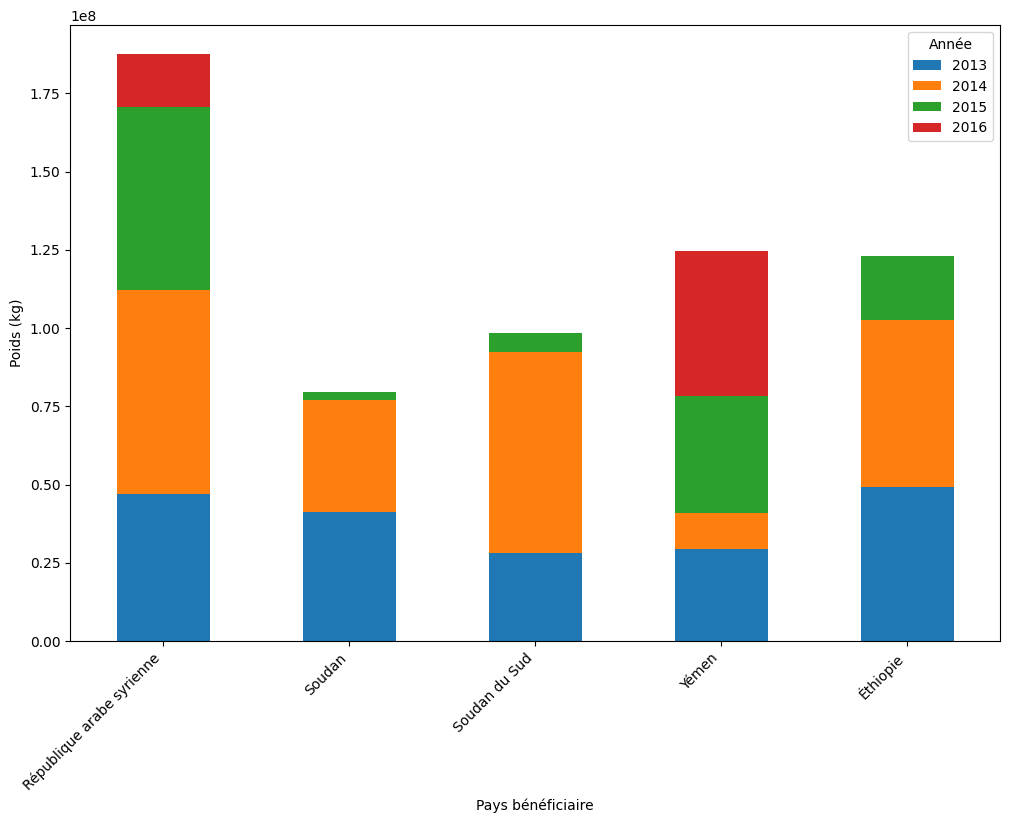

In [574]:
#Argumentaire pour analyse

# Filtrer le DataFrame avec la liste de pays bénéficiaires
aide_alimentaire_filtre = aide_alimentaire[aide_alimentaire['Pays bénéficiaire'].isin(pays_plus_beneficiaires)]

# Trier le DataFrame par poids_kg de manière ascendante
aide_alimentaire_filtre = aide_alimentaire_filtre.sort_values(by='poids_kg', ascending=True)

# Pivoter les données pour avoir l'évolution de 2013 à 2016 pour chaque pays bénéficiaire
pivot_table = aide_alimentaire_filtre.pivot_table(index='Pays bénéficiaire', columns='Année', values='poids_kg')
pivot_table = pivot_table.applymap(lambda x: round(x, 2))



# Afficher les valeurs uniques pour la colonne 'Pays bénéficiaire' avec les poids correspondants
unique_pays_beneficiaire = aide_alimentaire_filtre.groupby('Pays bénéficiaire')['poids_kg'].first()

# Afficher l'évolution de 2013 à 2016 pour chaque pays bénéficiaire
print("Évolution de 2013 à 2016 pour chaque pays bénéficiaire:")
display(pivot_table)

# Créer un graphique à barres
pivot_table.plot(kind='bar', figsize=(12, 8), stacked=True)

# Ajouter une légende
plt.legend(title='Année')

# Définir les étiquettes des axes
plt.xlabel('Pays bénéficiaire')
plt.ylabel('Poids (kg)')

# Faire pivoter les étiquettes de l'axe des x pour améliorer la lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.show()


In [575]:
# Remplacez 'Année' par le nom de la colonne correspondant à l'année dans votre DataFrame

# Filtrer les données pour la tranche d'année 2013-2016
df_filtre = aide_alimentaire[(aide_alimentaire['Année'] >= 2013) & (aide_alimentaire['Année'] <= 2016)]

# Ensuite, effectuez votre analyse sur les données filtrées
top_pays = df_filtre.groupby('Pays bénéficiaire')['poids_kg'].max().nlargest(5)

# Afficher la liste des noms de pays
pays_plus_beneficiaires = top_pays.index.tolist()

print(pays_plus_beneficiaires)


['Éthiopie', 'République arabe syrienne', 'Soudan du Sud', 'Yémen', 'Soudan']


In [576]:
# Affichage des pays avec l'aide alimentaire par année filtre par 10 

# Filtrer les données pour la tranche d'année 2013-2016
df_filtre = aide_alimentaire[(aide_alimentaire['Année'] >= 2013) & (aide_alimentaire['Année'] <= 2016)]

# Ensuite, effectuez votre analyse sur les données filtrées
resultats_par_pays = df_filtre.groupby(['Pays bénéficiaire', 'Année'])['poids_kg'].sum()

# Sélectionner les 10 pays avec l'aide alimentaire totale la plus élevée
top_pays = resultats_par_pays.groupby('Pays bénéficiaire').sum().nlargest(10).index

# Filtrer les résultats pour les 10 pays sélectionnés
resultats_top_pays = resultats_par_pays[resultats_par_pays.index.get_level_values('Pays bénéficiaire').isin(top_pays)]

# Afficher les résultats
display(resultats_top_pays)


Pays bénéficiaire                 Année
Bangladesh                        2013     131018000
                                  2014     194628000
                                  2015      22542000
Kenya                             2013     220966000
                                  2014     217418000
                                  2015     114452000
Niger                             2013      62720000
                                  2014      66226000
                                  2015      54656000
                                  2016      92742000
République arabe syrienne         2013     563566000
                                  2014     651870000
                                  2015     524949000
                                  2016     118558000
République démocratique du Congo  2013     150320000
                                  2014      70134000
                                  2015      68048000
Somalie                           2013     139800000
      

In [577]:
# Trouver le pays avec le poids d'aide le plus élevé
pays_plus_aide = aide_alimentaire.loc[aide_alimentaire['poids_kg'].idxmax(), 'Pays bénéficiaire']

# Afficher le pays avec le poids d'aide le plus élevé
print(f"Le pays avec le poids d'aide le plus élevé est : {pays_plus_aide}")



#vérification

# Trouver le pays avec le poids d'aide le plus élevé
pays_plus_aide = aide_alimentaire.loc[aide_alimentaire['poids_kg'].idxmax(), 'Pays bénéficiaire']

# Filtrer le DataFrame pour le pays avec le poids d'aide le plus élevé
aide_pays_plus_aide = aide_alimentaire[aide_alimentaire['Pays bénéficiaire'] == pays_plus_aide]

# Afficher l'aide alimentaire par année et par zone pour le pays avec le poids d'aide le plus élevé
print("Aide alimentaire par année et par zone pour le pays avec le poids d'aide le plus élevé:")
display(aide_pays_plus_aide[['Année', 'Pays bénéficiaire', 'poids_kg']])


Le pays avec le poids d'aide le plus élevé est : Éthiopie
Aide alimentaire par année et par zone pour le pays avec le poids d'aide le plus élevé:


,Année,Pays bénéficiaire,poids_kg
354,2013,Éthiopie,170000
355,2014,Éthiopie,466000
356,2015,Éthiopie,244000
357,2013,Éthiopie,181066000
358,2014,Éthiopie,178646000
359,2015,Éthiopie,74090000
360,2013,Éthiopie,2939000
361,2014,Éthiopie,2490000
362,2013,Éthiopie,256196000
363,2014,Éthiopie,265013000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [578]:
#Calcul de la disponibilité totale de calories par personne et par jour pour chaque zone
#Calcul de la moyenne par jour (faciliter la comparaison entre différentes zones en termes de disponibilité alimentaire moyenne quotidienne)

# Nombre de jours dans une année typique
jours_par_an = 365

# Calculer la disponibilité totale de calories par personne et par jour pour chaque zone
disponibilite_kcal_personne_jour = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()

# Calculer la moyenne par jour
disponibilite_kcal_personne_jour['Moyenne par jour'] = disponibilite_kcal_personne_jour['Disponibilité alimentaire (Kcal/personne/jour)'] / jours_par_an

# Arrondir la moyenne à deux décimales
disponibilite_kcal_personne_jour['Moyenne par jour'] = disponibilite_kcal_personne_jour['Moyenne par jour'].round(2)

# Afficher le DataFrame résultant
display(disponibilite_kcal_personne_jour)


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Moyenne par jour
0,Afghanistan,2087.0,5.72
1,Afrique du Sud,3020.0,8.27
2,Albanie,3188.0,8.73
3,Algérie,3293.0,9.02
4,Allemagne,3503.0,9.60
...,...,...,...
169,Émirats arabes unis,3275.0,8.97
170,Équateur,2346.0,6.43
171,États-Unis d'Amérique,3682.0,10.09
172,Éthiopie,2129.0,5.83


In [579]:
# Sélectionner les 10 pays ayant reçu le plus d'aide alimentaire, triés par poids décroissant
pays_plus_dispo_alimentaire = aide_alimentaire.nlargest(50, 'poids_kg').sort_values(by='poids_kg', ascending=False)

# Supprimer les doublons basés sur la colonne 'Pays bénéficiaire'
pays_plus_dispo_alimentaire = pays_plus_dispo_alimentaire.drop_duplicates(subset='Pays bénéficiaire')

# Afficher le DataFrame résultant
display(pays_plus_dispo_alimentaire)


,Pays bénéficiaire,Année,Produit,poids_kg
363,Éthiopie,2014,Céréales,265013000
1014,République arabe syrienne,2014,Céréales,225007000
1294,Soudan du Sud,2014,Céréales,213730000
1425,Yémen,2016,Céréales,196027000
1271,Soudan,2014,Céréales,145696000
63,Bangladesh,2014,Céréales,94706000
627,Kenya,2014,Céréales,92993000
1068,République démocratique du Congo,2013,Céréales,58011000
1244,Somalie,2013,Céréales,56643000
1376,Tchad,2014,Céréales,42874000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [580]:
# Trier le DataFrame par disponibilité alimentaire par jour de manière croissante
dispo_alimentaire_trie = dispo_alimentaire.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)

# Sélectionner les 10 premières lignes du DataFrame trié et afficher les colonnes 'Zone' et 'Disponibilité alimentaire par jour (Kcal/personne/jour)'
bottom_10_dispo_alimentaire = dispo_alimentaire_trie.head(10)[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]

# Afficher le DataFrame résultant avec les 10 zones ayant la moins de disponibilité alimentaire par jour
display(bottom_10_dispo_alimentaire)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
7029,Japon,-21.0
12046,République démocratique populaire lao,0.0
3907,Cuba,0.0
9975,Nouvelle-Calédonie,0.0
12385,Sainte-Lucie,0.0
3903,Cuba,0.0
3902,Cuba,0.0
3901,Cuba,0.0
12386,Sainte-Lucie,0.0
9973,Nouvelle-Calédonie,0.0


In [581]:
# Trier le DataFrame par disponibilité alimentaire par jour de manière décroissante
dispo_alimentaire_trie_decroissant = dispo_alimentaire.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)

# Sélectionner les 10 premières lignes du DataFrame trié de manière décroissante
top_10_dispo_alimentaire_decroissant = dispo_alimentaire_trie_decroissant.head(10)[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]

# Afficher le DataFrame résultant avec les 10 zones ayant la plus faible disponibilité alimentaire par jour
display(top_10_dispo_alimentaire_decroissant)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
1331,Bangladesh,1711.0
1085,Azerbaïdjan,1666.0
14108,Tunisie,1576.0
2693,Cambodge,1518.0
14194,Turkménistan,1469.0
259,Algérie,1424.0
12043,République démocratique populaire lao,1408.0
8796,Maroc,1392.0
14768,Viet Nam,1390.0
7673,Lesotho,1379.0


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
7029,Japon,-21.0
12046,République démocratique populaire lao,0.0
3907,Cuba,0.0
9975,Nouvelle-Calédonie,0.0
12385,Sainte-Lucie,0.0
6818,Israël,0.0
12381,Saint-Vincent-et-les Grenadines,0.0
3933,Côte d'Ivoire,0.0
9959,Norvège,0.0
6835,Italie,0.0


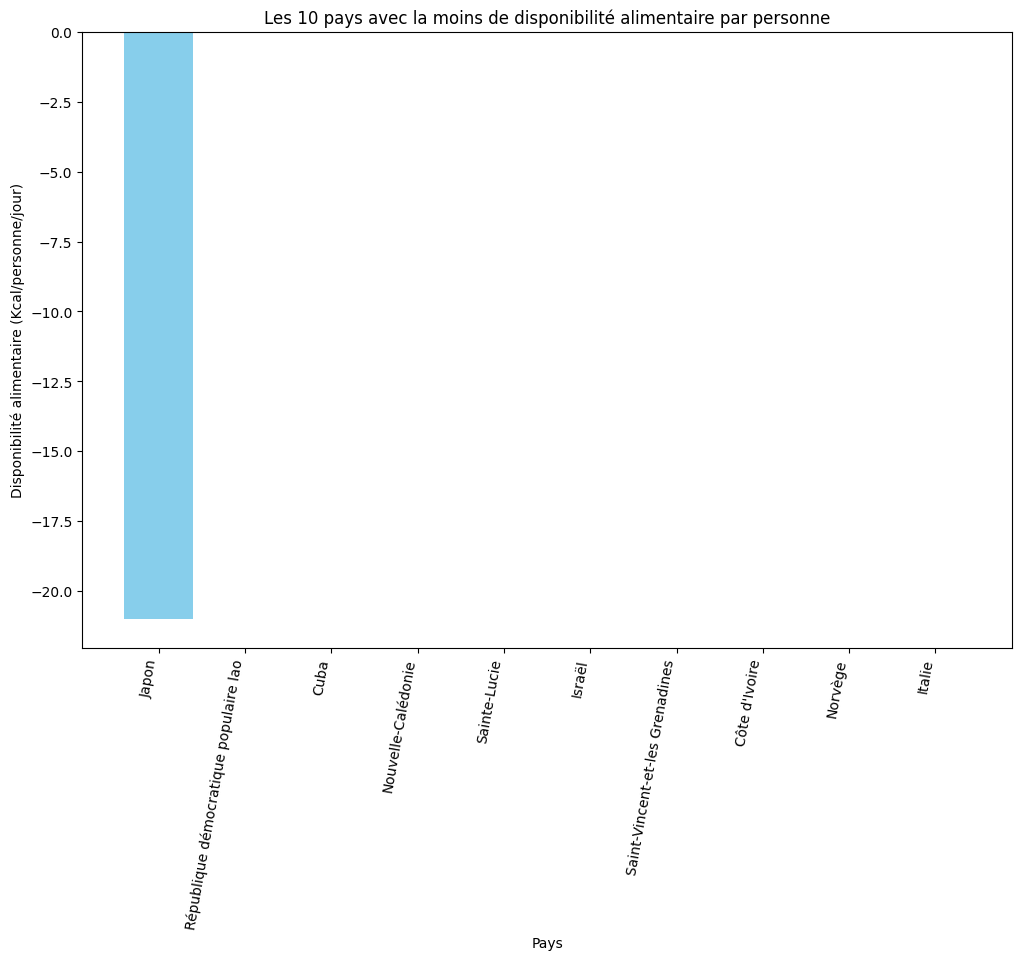

In [582]:
# Affichage des 10 pays qui ont le moins de disponibilité alimentaire par personne en kcal par jour

# Trier le DataFrame par la disponibilité alimentaire en calories par personne et par jour de manière croissante
dispo_alimentaire_trie = dispo_alimentaire.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)

# Supprimer les doublons dans la colonne 'Zone' du DataFrame trié
dispo_alimentaire_unique = dispo_alimentaire_trie.drop_duplicates(subset='Zone')

# Sélectionner les 10 premières lignes du DataFrame trié et afficher les colonnes 'Zone' et 'Disponibilité alimentaire (Kcal/personne/jour)'
bottom_10_unique = dispo_alimentaire_unique.head(10)[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]

# Afficher le DataFrame résultant avec des valeurs uniques
display(bottom_10_unique)

# Créer un graphique à barres avec Matplotlib
plt.figure(figsize=(12, 8))
plt.bar(bottom_10_unique['Zone'], bottom_10_unique['Disponibilité alimentaire (Kcal/personne/jour)'], color='skyblue')
plt.title('Les 10 pays avec la moins de disponibilité alimentaire par personne')
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.xticks(rotation=80, ha='right')

# Afficher le graphique
plt.show()


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire totale (Kcal/personne/an)
0,Afghanistan,2087.0,761755.0
1,Afrique du Sud,3020.0,1102300.0
2,Albanie,3188.0,1163620.0
3,Algérie,3293.0,1201945.0
4,Allemagne,3503.0,1278595.0
...,...,...,...
169,Émirats arabes unis,3275.0,1195375.0
170,Équateur,2346.0,856290.0
171,États-Unis d'Amérique,3682.0,1343930.0
172,Éthiopie,2129.0,777085.0


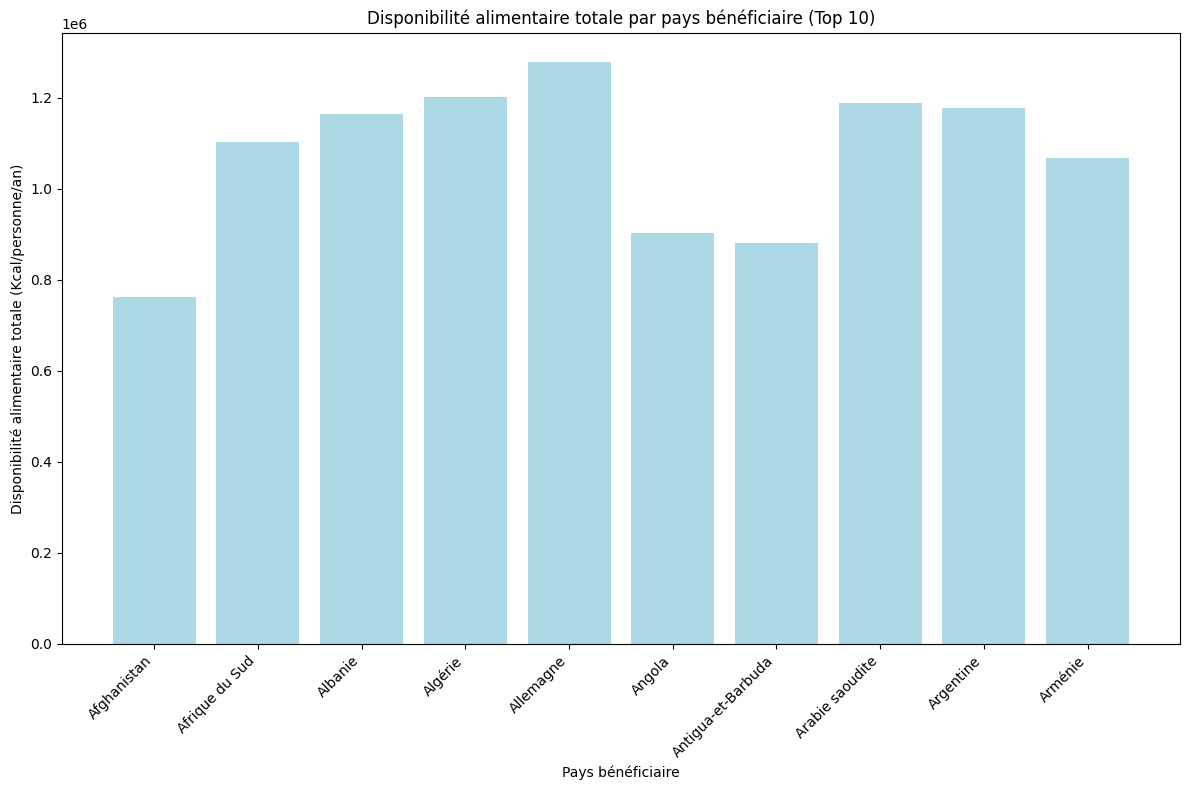

In [583]:
# Grouper par pays bénéficiaire et calculer la disponibilité alimentaire totale par an
dispo_alimentaire_totale_par_pays = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()

# Calculer la disponibilité alimentaire totale par an pour chaque pays
dispo_alimentaire_totale_par_pays['Disponibilité alimentaire totale (Kcal/personne/an)'] = dispo_alimentaire_totale_par_pays['Disponibilité alimentaire (Kcal/personne/jour)'] * 365

# Afficher le DataFrame résultant
display(dispo_alimentaire_totale_par_pays)



#graphique barre verticale 

# Sélectionner les 10 premiers pays bénéficiaires
top_10_pays_beneficiaires = dispo_alimentaire_totale_par_pays.head(10)

# Créer un graphique à barres avec Matplotlib
plt.figure(figsize=(12, 8))
plt.bar(top_10_pays_beneficiaires['Zone'], top_10_pays_beneficiaires['Disponibilité alimentaire totale (Kcal/personne/an)'], color='lightblue')
plt.title('Disponibilité alimentaire totale par pays bénéficiaire (Top 10)')
plt.xlabel('Pays bénéficiaire')
plt.ylabel('Disponibilité alimentaire totale (Kcal/personne/an)')
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
1331,Bangladesh,1711.0
1085,Azerbaïdjan,1666.0
14108,Tunisie,1576.0
2693,Cambodge,1518.0
14194,Turkménistan,1469.0
259,Algérie,1424.0
12043,République démocratique populaire lao,1408.0
8796,Maroc,1392.0
14768,Viet Nam,1390.0
7673,Lesotho,1379.0


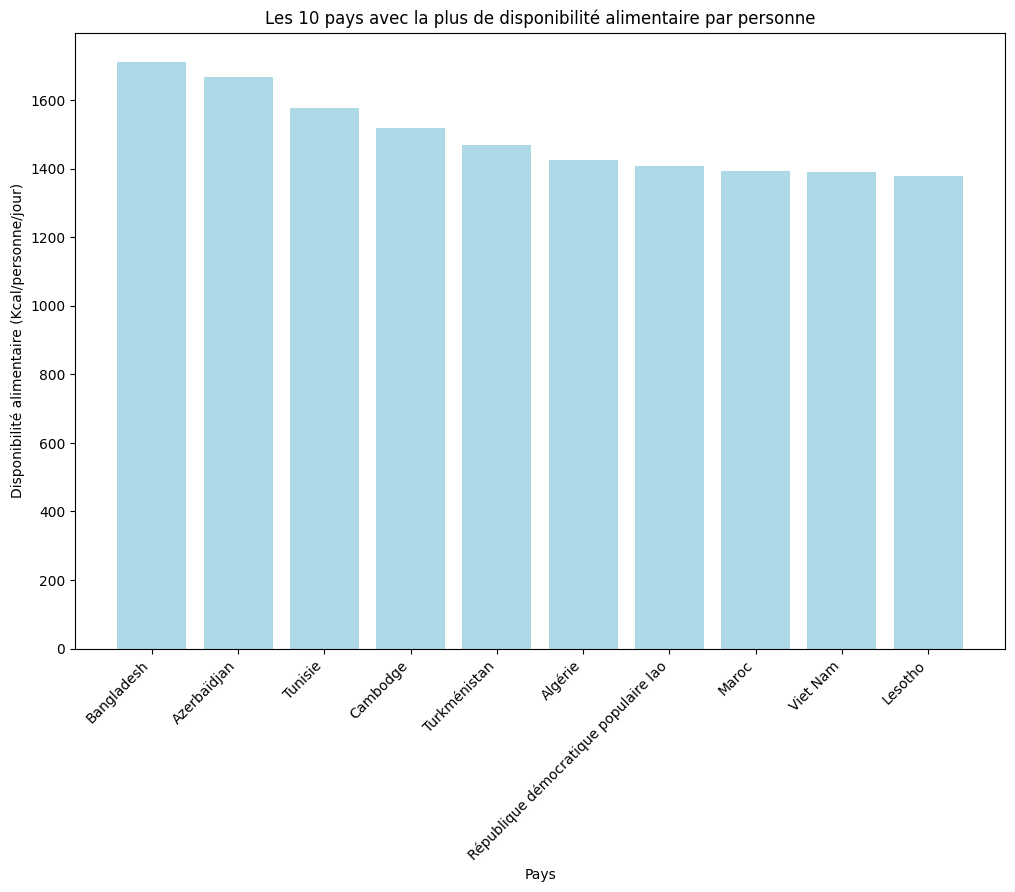

In [584]:
# Trier le DataFrame par la disponibilité alimentaire en calories par personne et par jour de manière décroissante
dispo_alimentaire_trie = dispo_alimentaire.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)

# Supprimer les doublons dans la colonne 'Zone' du DataFrame trié
dispo_alimentaire_unique = dispo_alimentaire_trie.drop_duplicates(subset='Zone')

# Sélectionner les 10 premières lignes du DataFrame trié et afficher les colonnes 'Zone' et 'Disponibilité alimentaire (Kcal/personne/jour)'
top_10_unique = dispo_alimentaire_unique.head(10)[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]

# Afficher le DataFrame résultant avec des valeurs uniques
display(top_10_unique)

# Créer un graphique à barres avec Matplotlib
plt.figure(figsize=(12, 8))
plt.bar(top_10_unique['Zone'], top_10_unique['Disponibilité alimentaire (Kcal/personne/jour)'], color='lightblue')
plt.title('Les 10 pays avec la plus de disponibilité alimentaire par personne')
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [585]:
#Tri du fichier source sous_nutrition en année distincte afin de faciliter les jointures

sous_nutrition['Année'] = sous_nutrition['Année'].replace(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018', '2017-2019'],[2013, 2014, 2015, 2016, 2017, 2018])
sous_nutrition['Année']

0       2013
1       2014
2       2015
3       2016
4       2017
        ... 
1213    2014
1214    2015
1215    2016
1216    2017
1217    2018
Name: Année, Length: 1218, dtype: int64

In [587]:
#Jointure entre sous_nutrition et population

popu_sous_nutrition = pd.merge(pop, sous_nutrition, on = ['Zone', 'Année'], how ='left')
popu_sous_nutrition = popu_sous_nutrition.rename(columns = {'Valeur_x':'population', 'Valeur_y': 'population_sous_nourrie'})
popu_sous_nutrition.head()

,Zone,Année,Population,sous_nutrition_million_hab
0,Afghanistan,2013,32269589,8.6
1,Afghanistan,2014,33370794,8.8
2,Afghanistan,2015,34413603,8.9
3,Afghanistan,2016,35383032,9.7
4,Afghanistan,2017,36296113,10.5


In [605]:
#Filtre du DataFrame population + sous_nutrition par zone et par année

popu_thailande_2017 = popu_sous_nutrition.loc[popu_sous_nutrition['Zone'] == 'Thaïlande'].loc[popu_sous_nutrition['Année'] == 2017]
popu_thailande_2017

,Zone,Année,Population,sous_nutrition_million_hab
1312,Thaïlande,2017,69209810,6.2


In [588]:
# Sélection des données "Manioc" dans dispo_alimentaire où la zone est 'Thaïlande'
dispo_alim_manioc = dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'Thaïlande'].loc[dispo_alimentaire['Produit'] == 'Manioc']

# Affichage du DataFrame résultant
display(dispo_alim_manioc)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0


In [592]:
#Jointure entre les deux DataFrame précédent
manioc_population_sous_nutrition_thailande = pd.merge(dispo_alim_manioc, popu_thailande_2017, on = ['Zone'], how = 'left')
manioc_population_sous_nutrition_thailande

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,sous_nutrition_million_hab
0,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,...,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0,2017,69209810,6.2


In [612]:
#Proportion de personnes en état de sous_nutrition en Thaïlande en 2017

proportion_sous_nourris = round(manioc_population_sous_nutrition_thailande['sous_nutrition_million_hab'].sum() * 1000 * 100 / manioc_population_sous_nutrition_thailande['Population'].sum(), 4)
proportion_sous_nourris = round(proportion_sous_nourris * 1000, 2)
print("En Thaïlande, " + str(proportion_sous_nourris) + " % de la population totale est sous-nourrie, soit " + str(manioc_population_sous_nutrition_thailande['sous_nutrition_million_hab'].sum()) + " millions de personnes.")

En Thaïlande, 9.0 % de la population totale est sous-nourrie, soit 6.2 millions de personnes.


In [611]:
#Proportions exportations de manioc

proportion_export = (manioc_population_sous_nutrition_thailande['Exportations - Quantité'].sum() * 100) / manioc_population_sous_nutrition_thailande['Production'].sum()
print("Malgré le fort taux de sous-nutrition, " + str(manioc_population_sous_nutrition_thailande['Exportations - Quantité'].sum()) + " milliers de tonnes sont exportés sur " + str(manioc_population_sous_nutrition_thailande['Production'].sum()) + " milliers de tonnes, soit " + str(round(proportion_export)) + " %.")

Malgré le fort taux de sous-nutrition, 25214.0 milliers de tonnes sont exportés sur 30228.0 milliers de tonnes, soit 83 %.


In [621]:
dispo_thailande = dispo_alimentaire[dispo_alimentaire['Zone'] == 'Thaïlande']
somme_disponibilite_interieure = dispo_thailande['Disponibilité intérieure'].sum()
display(dispo_thailande)
print('La Thaïlande dispose de',somme_disponibilite_interieure,'disponibilité intérieure')

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13759,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74.0,5.0,33.0,75.0,0.0,45.0,0.0,0.0,0.0
13760,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8.0,6.0,2.0,6.0,0.0,12.0,0.0,2.0,0.0
13761,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358.0,0.0,0.00,0.00,0.00,358.0,110.0,21.0,0.0,0.0,447.0,0.0,0.0,0.0
13762,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12.0,7.0,19.0,12.0,0.0,0.0,0.0,0.0,0.0
13763,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782.0,1449.0,9.0,671.0,110.0,2209.0,0.0,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,Thaïlande,Viande de Suides,animale,0.0,0.0,124.0,13.00,11.83,3.92,871.0,22.0,1.0,871.0,0.0,891.0,0.0,0.0,0.0
13850,Thaïlande,Viande de Volailles,animale,0.0,0.0,52.0,13.69,3.62,4.49,945.0,536.0,11.0,917.0,28.0,1470.0,0.0,0.0,0.0
13851,Thaïlande,"Viande, Autre",animale,0.0,0.0,0.0,0.03,0.01,0.02,-92.0,96.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
13852,Thaïlande,Vin,vegetale,0.0,0.0,0.0,0.12,0.00,0.00,8.0,8.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0


La Thaïlande dispose de 158130.0 disponibilité intérieure


In [617]:
dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [608]:

# Calculer la somme des exportations de manioc
exportations_manioc = dispo_alimentaire.loc[dispo_alimentaire['Produit'] == 'Manioc', 'Exportations - Quantité'].sum()



# Calculer la quantité moyenne de manioc exportée
moyenne_quantite_manioc_exportee = exportations_manioc.mean()
print("Moyenne de la quantité de manioc exportée :", moyenne_quantite_manioc_exportee)


Moyenne de la quantité de manioc exportée : 36052.0


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [ ]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 

#Mesurer la disponibilité alimentaire dans les pays occidentaux aurait permis de comparer les pertes et la distribution avec les nations vulnérables.
#Évaluer si les coûts des pertes pourraient atténuer l'insécurité alimentaire ou servir d'assistance supplémentaire. 
#En outre, examiner les productions agricoles et les exportations aurait permis de déterminer leur impact sur le problème de la famine.
#Comparaison avec les pays recevant moins d'aide alimentaire.

